In [1]:
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords

import re
import csv
import string
from random import shuffle
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
import nltk
nltk.download('wordnet')

emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens


def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', 'url', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

def remove_punctuations(text):
    translator = str.maketrans('', '', string.punctuation)
    out = text.translate(translator)
    return out

def prepro_stack(body,lowercase=True):
    if lowercase:
        ret = body.lower()
    ret = remove_urls(ret)
    ret = remove_punctuations(ret)
    tokens = word_tokenize(ret)
    #tokens = [stemmer.stem(token) for token in tokens]
    tokens = [WordNetLemmatizer().lemmatize(token) for token in tokens]
    ret = " ".join(w for w in tokens if (w not in stop_words and len(w) > 1))
    return ret



[nltk_data] Downloading package wordnet to C:\Users\Soumik
[nltk_data]     Mukherjee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [92]:
data_rows = dict()
data_rows['body'] = []
data_rows['y'] = []
with open('C:/Users/Soumik Mukherjee/Desktop/PGDBA/Semester 3/CDA/Project/data.csv','r', encoding='utf-8', errors='ignore') as csv_fp:
    count = 0
    csvreader = csv.reader(csv_fp, skipinitialspace=True)
    #next(csvreader)
    for row in csvreader:
        count = count + 1
        tmp=prepro_stack(row[0])
        print (row[1])
        data_rows['body'].append(tmp)
        print (str(count) + '\t' +  row[0] + '\t' +row[1])
        if (row[1]==' ' or row[1]==''):
            print (count)
            data_rows['y'].append("NA")
        else:
            data_rows['y'].append(row[1])



    
X_tmp=data_rows['body']
#X_test=X_tmp[1101:]


#print(len(X_tmp))
Y_tmp=data_rows['y']
#print (len(Y_tmp))
X=list()
Y=list()
for i in range(len(X_tmp)):
    if( Y_tmp[i]=='1' or Y_tmp[i]=='2' or Y_tmp[i]=='3' or Y_tmp[i]=='4' or Y_tmp[i]=='5'):
        X.append(X_tmp[i])
        Y.append(Y_tmp[i])
    elif(Y_tmp[i]==""):
        X.append(X_tmp[i])
        Y.append("NA")


rating
1	Review	rating
2
2	Don't go for this product - Don't go for this product. Camera is not like 20 MP. Battery is also like 1500mah. Don't purchase it.	2
1
3	Don't buy - Wrist phone	1
1
4	The phone is very good but one thing i really hate is battery life, its very poor battery life - If MI might provided AMOLED display the battery 3000mh was good, but with LCD IPS display 3000 is very poor almost one day is maximum life	1
2
5	Overall experience-Not satisfied - This phone behaves itself. The notification tones will switch off itself. Battery is really bad. Camera is OK. Absence of head phone jack gives space for dual speakers due to which sound is too much, really not required. Got this one after hearing the success of Mi A1, but not satisfied.	2
3
6	Received Defective - Received defective one, Amazon is replacing the device after complaint.	3
3
7	Warranty card - There wasn't a warranty card....???Mi A2 don't have warranty.....	3
2
8	Mobile performance got drastically reduced after

305	sound quality not good - not bad	3
3
306	Camera is the only good thing in this - Not a good phone with all time ads pop-ups any where from mobile software, only good thing in this is it camera	3
2
307	Don't buy Mi 2 at all in this price. - Camera is poor & very average, display is also poor, battery performance is also poor. Just it's design is nice. It's fun functioning not easily accessible. I have used Radmi Note 5 Pro, it's superb than MI 2.	2
3
308	Not satisfied battery life is worst ?? - I didn't like this phone that much the battery life is worst and the camra that i wast expecting is not upto the mark i think honor play is far better then it may be because this phone in india launch in high prize	3
1
309	Worst mobile... Proximity sensor is worst... - Only dislikes	1
2
310	The product is not so good - The Picture quality is not good and sound is very very low	2
3
311	Not for music - No hadephone 3.5mm jack is in so use less for me	3
3
312	Not good - Product is good but the f

1
632	Bad product - Jus worked for 2 months n suddenly stopped working after that..got switched off automatically	1
2
633	5 - I can unbox phone but bill no received	2
3
634	PAYMENT ISSUE - How you can deduct full payout through account when emi option selected.

Need to be reversed soon	3
2
635	Fingure touch issue and face thehanging but all is well part not found in service centre mi ?????? - Nice phone but some time face the problem in touch slow Battery life is not good	2
1
636	Not satisfied - Battery backup is worst	1
1
637	Phone is average... Camera is good - this phone is heatup during charging or play video games.
Network showing OK but data transfer rate is low, means net not working fast.
Camera is OK.... But front camera having hanging issue during photography...
mic problem - listener complain low quality audio during calling.
this is made in India phone, many issues is there. A1 model is far better than A2.	1
3
638	Three Stars - Hang over the call ..	3
1
639	Amazon's reputa

930	Mi A2 failure model..after replacement it is fine - Useless model, I purchased based on xioami quality. Within one month the phone dead. I am running to service centre, got replacement. It's working. Appreciate their services	1
2
931	Dust on camera panel.. - Dust like particle inside camera panel..
Go service center and clean it.. after 2 days I notice dust come again on camera panel.

Again clean it and packed phone and not use it

After 3 days same problum.
I don't know from where..
Please fix problum..	2
3
932	Very poor battery backup - Very poor battery life, lasts just for 5-6 hrs after full charge, very dissapointed with battery life, otherwise a good phone	3
3
933	Three Stars - it not what I expected from google MI.	3
1
934	Lool - Wrst mbl fclty as lke my wrdd	1
1
935	Please change my product - Product not working please change the product. Problem number one one mobile camera hang. Problem number 2 slow process and not perfectly  working. Please change my product.	1
3
936	O

1
1327	Call settings issue - Call settings change every time.	1
3
1328	pl back my mony soon - no batery backup so not meet my requirement im not confirming back so im lokking next to purchase so pl, back my monny soon	3
3
1329	Buy only if big discount, or just ignore - Face recognition is slow as compared with other device in market.

Image stabilization is less

Low light photo are good.	3
1
1330	Koi mat kharido - Very bad mobile
Poor battery	1
3
1331	Mi a2 - Only battery proformans and power system is very bad	3
1
1332	Hanging issue - Hanging prob many times	1
1
1333	Plz don't but this phone very poor Android one is such a cheep software - Very poor quality product is given by mi break the trust

It is all due to Android one plz don't but Android one phone very discussing ??????	1
1
1334	Crap waste of money , Unsuitable even for basic usage - I wouldn't give a penny more then 5000 RS for such stupid creation . I mean a branded phone ls can give you a lot more. I am not getting into t

3
1680	Think before you buy but not everything in this world full fill your desires. - 1) Battery: Worst battery backup lasts just 3hours or less from 90 to 10 on continuous usage of YouTube.
2) Camera: expected alot from dual camera with 20 mp but not better from other mobiles it is just better than 8000 Ra MI mobiles, HDR was just better. I'll give rating 3.
3) All other things was good, it's a performance beast, quality in games were awesome than other vivo and oppo mobiles too.
4) Not MI software in this, just ggl update it's very boring bcoz of the simplicity,
Not and never logging.
5) I'm facing most frequently call bugs, I don't it's bcoz of sensor or what, what happens is when called or attend any calls the screen was completely black and touching of fingerprint or lockscreen or anybuttons are of no use to me, but the call goes on when kept near ??, sent feedback to MI but no use, may be they will clear this is next update.
6) Google updates and security are awesome. This mobil

1929	Nothing is good in this phone - completely waste phone nothing is better I didn't buy an mi phone again in my lifetime because that much I hate no build quality you must study how to make a phone an sale that's better i didn't see before like this local phone don't buy anyone this phone please	1
1
1930	bad experience - Got new phone, but there was a crack on the back camera so i requested replacement and i got new one. I used the new phone phone everything is fine but when i upgrade the phone to android pie then device went for reboot and never ON after this. Only white screen came with android one text.
finally i returned the product.	1
1
1931	Waste of money - Just don't buy this phone ultra slow, hangs a lot even in normal usage forget about gaming	1
1
1932	Not value for money - Very pathetic phone, automatically switch off anytime and doesn't start	1
1
1933	Mi A2 - The phone as expected is not of the best quality a slow phone hangs in between a call and even in beginning.Video 

2179	Poor Phone, only has Good Camera - After two days of usage I realized that this phone sucks. The only good thing about it is Camera, no doubt this is best camera phone in this segment but rest everything is poor.
I don't know if this is xiaomi or google behind such poor integration of software and hardware.

Battery drains like anything, you can sit and see it draining. It caused me to sell this.

Pls choose Honor Play that is more worth than this one.	1
2
2180	Case and screen guard provide is broken - Not as per specifications	2
3
2181	Battery backup is very low. Getting heated for normal use itself. - Battery backup is very low,	3
3
2182	Overall the phone is good, but battery sucks. - The phone is very good, nice performance, good quality camera, decent sound, stock android, overall good. But the main problem in this phone is battery, its the worst, though it supports fast charging, but the battery is not satisfied you. If you are a genuine camera lover then just go for it, till

1
2429	Please Don't Buy - MI's worst phone Ever in my life...
Wasted Money Battery back up LOL and RAM doesn't mean
Hanging problem is always	1
3
2430	its hang with in month - phone is good as per price picture quality is very good. but yh abi 1 month b ni hua hang krta hai . or ek hi slot hai charging and earphone ka big demerit battery abi tk thk chl rhi hai agy dekho phone is ok ok not upto the mark	3
1
2431	Heating Problem - ....is this phone is  heating problem...	1
1
2432	Charge - Charge	1
3
2433	Just like that - Nothing is special	3
2
2434	Don't buy - Battery life is poor and my sub board is not working after 11 days of use and Amazon fool about return policy	2
2
2435	It's of no worth - Not worthy, proximity sensor placed wrong built is good software is above good, but overall not a flawless device, leave it	2
1
2436	Replace mi a1 - I purchase this mobile last month it's not wrok properly from the first day ..it's touch not wrok properly and many time hanging problem ... create 

3
2744	Battery Backup is poor - Picture quality is good	3
1
2745	Bad quality mobile hand set - Very very upset.... I think Amazon has given refurbished Handset and not the Brand new piece.. I have to show it to the MI service center twice.. Now they are saying motherboard is damaged and you better contact Amazon for it... I have purchased many MI mobile from Mi app but never had such a problem... I think Amazon has cheated me.	1
1
2746	Battery draining too speed. - After 3month of usage. and whn update the battery draining too fast like only 2-3 hours..	1
1
2747	Bad product - Jus worked for 2 months n suddenly stopped working after that..got switched off automatically	1
3
2748	1 year screen replacement - I have not received a mail as of now about my 1 year screen replacement.	3
1
2749	Don't buy this mobil, Amazon policies sucks - Worst mobile have ever used.
Don't have head phone jack. If you want to connect head phone you have to attach a connector to the charger and then listen to th

3178	battery very bad dont buy it - battery life verry poor	1
3
3179	Myriad software issues - Seems there are major software issues with this phone.  Which is not acceptable after considering that the phone has had 2 major updates (including Android Pie), so plenty of time to fix.

Google Play had issues with:
- Error 495 randomly while updating or installing apps
- Clear data/cache does not work every time.
- More than once, download stalled with message "Waiting for wifi" while the phone was clearly on an active wifi connection

Stock Android should mean 'clean with no bloat', but here it means that many essential apps/settings are also missing from the phone.  It seems to me that MI does not want this phone to get too popular otherwise their data syncing redmi phones won't sell any more.  How else could one explain these software lapses, plus the fact that a 3000 mAh battery is unheard of in this price range, it should have been at least 3300, or that the phone supports quick charge

3
3514	Great phone for the price - Amazing photos for its price. Decent performance for moderate use. Loudspeaker is bit low. Battery life could have been better. Hopefully update would fix it	3
3
3515	Wifi and Bluetooth Quality is really bad..!! - Wifi and Bluetooth Quality is really low. Wifi connectivity is worst I have seen. Parents own Redmi 4 and they have better connectivity at the same spot in house. Not expected in 17k phone.	3
2
3516	Headphone - Headphone jack is defective	2
2
3517	I'm not surtisfy of this product . - Camera picture click time is slow means interval time is let and long of two continue capture and i'm not surtisfy the reare camera.
Fingerprint sensor are not work in picture click. So this is the main disadvantage of miA2	2
1
3518	Ok ok for money - Ok ok	1
3
3519	Good - Good	3
1
3520	Update problem - Update problem.	1
2
3521	Battery back up is not good - Need to improve battery. The first thing we see in mobiles is battery. But this devices battery is not even

3
3774	Decent phone, scope for improvement - Sound is good but battery life is an issue.could be improved	3
2
3775	Hhg - Gfg	2
1
3776	Not good  so heng - Please dnt buy mi not good quality	1
3
3777	Don't buy this phone - Don't buy this product. Mobile has WiFi issues , sound issues and picture quality also not expected. You can see the reviews in Google as well	3
2
3778	We lost d phone - Good	2
3
3779	Poor battery support.. - Battery lasts on 6 to 7 hrs	3
1
3780	Mi A20 not turning on. - Mi A20 mobile is not turning on, no response from Amazon for replacement.	1
3
3781	Good camera phone with average battery - Camera is good. Great pics	3
1
3782	Cashback issues - I used my hdfc card. But I didnt get cashback.	1
1
3783	Xiaomi poor - Poor quality	1
2
3784	Don't buy - Please  don't buy main thing no battery back up without battery backup having phone is waste ..so please don't buy	2
1
3785	Worst mobile - Worst mobile ever	1
1
3786	Worst phone - Worst fhone	1
1
3787	Worst Battery life - Batt

3
4113	Ok - Not bad	3
3
4114	Not good - Heat issue	3
1
4115	Not Satisfied - Not Satisfied	1
3
4116	Replace my phone as soon as possible - My phone have problem with speaker. Their sound is not good. It's speaker quality irritated me.
Battery quality is very low	3
3
4117	Not good enough. - Very slow.Not satisfactory.	3
1
4118	Note plzz - Battery not good ,cemara  good and hung problem	1
1
4119	Cheap phone & cheap service of amazone - Very cheap quality And misseling  of phone and another cheap thing of amazone team ,amazone team not able to Reture this item	1
1
4120	Useless Product from Xaiomi - I have exchanged my oppo F3 plus and bought this mobile thinking this would be better. But after using it for more than one month I am facing a lot of issues.
1. Phones get hang some times when browsing the web, which never happened with my previous mobile.
2. Whenever taking a snap with the front camera after clicking the photo I have noticed shutter lag. It is taking 5 seconds to process the i

4427	Good camera phone with lots of serious bugs - Headphone isnt detected. Abnormal behaviour of proximity sensor. The screen is turned on and off because of faulty proximity sensor. I didnt expect such a phone from mi.	1
3
4428	Day light condition is so bad - Picture quality was so bad in day light condition worst ever... U can't see whose calling... Don't buy if u r a day worker	3
1
4429	Horrible phone - Battery gets drained very quickly not worth the amount	1
1
4430	* - Very sad I am recieved defective item	1
3
4431	Mi A2 Review - Aluminium body and iphone lile look and finish with average hardware n average camera even the screen quality is ok with more blue light emitted	3
2
4432	Bakwas mobile - Batter life is so bad.	2
1
4433	Camera - There is a problem in this mobile
Total dust is getting into the back camera and closing the screen.
Due to that issue i cannot take the pictures nicely	1
3
4434	Faltu battery life - Useless phone.better to buy note 5 pro...  Or upcoming note 6pro.

1
4802	very bad phone with too much lag and response in touch - do not buy this phone. very very slow touchscreen	1
2
4803	Bad Battery Backup - Sad battery for a good phone. Battery drain quick while using the phone on game and music mode.	2
1
4804	Battery backups - Bad back up battery	1
3
4805	Not upto the mark level - Android one is not supporting properly to handset. Often Hanging and hardware is also not good. Restart issue.	3
2
4806	Mader bord problem - Ghatiya brand 6 bar mader bord change his sirf 2, month me	2
1
4807	Ringing sound not working properly - Ringing sound not good some time speaker vibrateing	1
3
4808	Very good camera quality - but you relly care about its camera when handling this phone	3
1
4809	Worst Battery backup.. - Worst product I got.. within 2:30hrs battery drain 60% to 9% on normal use.	1
1
4810	My last MI phone. Lost trust - Type c connecter provided for earphones doesn't work
Phone switches off randomly biggest issue
17 k phone and the exchange value afte

5
5177	Value for money - Good product	5
4
5178	Good go - Good	4
5
5179	I have 2 of these. What more can I say? - Best phone if you have a low budget. It is best for family members who are not so tech savvy. Good battery life, great display ( 18:9 modern look), Respectable performance, and a fairly good camera for the price.	5
5
5180	Nice - Good	5
5
5181	Good as per price - Budget oriented cell phone
Camera imporved from 5 series.
Battery is overall good
Screen size good in this price.
Sound quality in loudspeaker is little weak but u cant have all in this price segment.

Overall best phone for normal users.
Dont go if u have heavy use so choose from higher mi series.	5
4
5182	Good phone under budget - But mi service so bad	4
5
5183	Nyc phone - Nyc pginw	5
5
5184	Niec - Niec	5
4
5185	A good one - Best mobile in that price........But need more space	4
5
5186	Nice - Nice	5
5
5187	Nice but not a good - It is better for middle class family	5
5
5188	Love - Love	5
5
5189	Good product - Excell

4
5677	Win win deal - No other brand is giving so much in under 6k price, go for this win win deal, really a good quality product, using it sinse 2 months	4
5
5678	Nice - Jwj	5
4
5679	Good - Good	4
5
5680	Good - Working good after using six month	5
4
5681	Nice - Nice	4
5
5682	good - good for the cost of it	5
4
5683	Not value for money - Not good	4
4
5684	Redmi 6A is VALUE FOR MONEY - Redmi 6A is a Budget Recommend phone currently available.  Value for money at this price. Good camera and display. Sleek and easy to use design. All hot and currently available features available in this phone	4
5
5685	Best phone in 6k - Picture quality is better as compared to other phones in this range	5
5
5686	Excellent - Awesomely perfect	5
5
5687	Classy handy - Very very good product in this price
Front & back camera just wow ??	5
5
5688	Good for the price and durable too - Sturdy, sleek and durable phone	5
5
5689	Best Value for Money Phone - Nice	5
5
5690	Best phone - Nice phone in this budget...... 

6176	Good but less battery life - Everything is good except battery life	5
5
6177	Very nice phone - Good phone	5
5
6178	it works - This mobile is quite nice with all you need for this money. Memory and Power are good.	5
5
6179	Best - Good product	5
5
6180	Nice prodact - Nice prodact
Case on delivari  honi cahihiy all prodact pr	5
5
6181	Better than Samsung's Phone - This smartphone is good, average camera quality, good display quality, battery is also good, comfortable in one hand. Thanks Amazon for fast delivery.	5
4
6182	Product working good - good	4
5
6183	Good - It's a good budget phone and good quality	5
5
6184	I Love Mi - Amazing Product	5
4
6185	Performance and value for money - Good smartphone form mi	4
4
6186	Face unluck is slow - Nice budget phone for normal use	4
4
6187	gud mobile - very gud mobile under 6k	4
5
6188	Good - Nothing	5
5
6189	Good product - Nice product by Mi	5
4
6190	Nice purchase - Good mobile nice camera battery backup not good but price is awesome	4
5
6191	

6676	Good - Money worth	4
5
6677	Good - Good	5
5
6678	I m loving mi brand - I like this phone in low budget	5
5
6679	Good phone .value for money phone .all good futures in this price .love it - Good phone .nice looking .good futures in this price . value for money phone	5
5
6680	Good product - Good product	5
4
6681	Good - Everything is fine for this budget	4
5
6682	Good one. - Good one.True valuation can be done after at least a few months.	5
4
6683	As per price - Basic	4
4
6684	very slim and very comfortable - nice	4
5
6685	Ok - Ok	5
5
6686	Budget mobile - Awesome	5
4
6687	Battery - Battery getting low very fast	4
5
6688	Good product - ??	5
4
6689	Very Good - Battery life is good.
Picture quality and sound is very good.	4
5
6690	Redmi - Good product	5
5
6691	amazing - love it	5
4
6692	Fine - Ecnomical	4
4
6693	Good experience - Awesome Handset at this price	4
4
6694	Good product - Original product provied by amazon	4
5
6695	Awesome mobile in this cost - Wonderful	5
4
6696	Low price be

5
7176	Good - Good	5
4
7177	Good budget phone for general use - Good budget phone for general use	4
5
7178	Nice - Nice product i suggest you buy this product i give 5 star rating	5
4
7179	ASSESSMENT OF REDMI 6A 32 GB PHONE - Like: Picture quality, Sound quality
To be improved:  Battery life quality.
Files in the phone cannot be transfereed to PC these should easily be transferred.
Overall it is a very good phone still now.
.	4
5
7180	Excellent budget phone - Good product in this range	5
4
7181	Okay - Ok ok	4
5
7182	My experience with redmi 6A - Redmi 6A(2+32GB)

This mobile is really a budget champion. It has 2gb ram and 32 gb rom. It has latest processor and it is very helpful for gaming. Oreo is the Android version. 13mp rear and 5 mp front camera is there. Camera quality is awesome.

Merits:-

Latest and fast processor

2gb ram

32gb rom

Excellent camera quality and battery backup

Face lock is enabled

Dedicated slots

Demerit:-

The only demerit is it has no fingerprint

But acco

4
7676	Slow performance - Battery performance is nice but charging is slow	4
4
7677	Awesome phone for better price - redmi 6a camera quality best i m so happy with this phone	4
4
7678	Good - Good	4
4
7679	Good quality smartphone. - Value for money. Best budget smartphone with top specification.	4
5
7680	Good! - Product	5
5
7681	Nice  disin - Good progress	5
4
7682	Good - Colour	4
5
7683	Best budget mobile with great features. - Thank you amazon for fast delivery.all the features are great within budget and amazon is beyond expectations. Thank you once again for this new year gift.	5
4
7684	Nice phone - I got it for my sis on her birthday. She likes it	4
4
7685	5999/- and 500 cashback - Overall, a good budget phone	4
5
7686	Awesome - Awesome	5
5
7687	Backup good, - Very gud product	5
5
7688	A decent phone - A good budget phone	5
4
7689	Best mobile is rate - Value for money	4
5
7690	Recommended mobile - Everything is good.	5
4
7691	Good product - Good product in this range	4
5
7692	Good 

8175	Super - Mobile super performance	4
4
8176	Mobile - All is good	4
4
8177	Awesome - All are good n this price range	4
5
8178	Budget phone ever - I have brought tons of this. 4 to be exactly.	5
5
8179	Good - Good	5
5
8180	NICE PHONE - NICE PHONE

U BELIEVE BECAUSE OF THIS BRAND	5
5
8181	Awesome - Awesome	5
4
8182	Good budget phone - like it	4
4
8183	5 out of 10 - Used to hang , rest is medium	4
5
8184	Good - Excellent	5
4
8185	Nice mobile - Good battery life	4
4
8186	nice - good product	4
5
8187	Original one - Original product received from Amazon
First time I have purchased	5
4
8188	Great experience to have this phone - Wow it's such fav experience to choose this redmi 6a	4
5
8189	Really good mobile - Awesome design and comfortable	5
5
8190	Tx - Suppar	5
5
8191	Super likely phone - Superrrr	5
5
8192	Low price and high quality - I am using redmi 6A mobile. Very high quality phone in low price.	5
4
8193	NICE PHONE - Not Bad in that price.	4
5
8194	Ok - Ok	5
4
8195	Poor battery - Pink 

8675	Display is not good - Display is not good. But in this price not bad	4
5
8676	Great phone - Best phone in this range	5
5
8677	Plz - No bill resipt print	5
5
8678	Very nice color - Good product	5
4
8679	Nice Phone - Good For The Price Segment	4
5
8680	Good - Good	5
5
8681	Achha Sasta aur Tikau - Achha phone hai... Sasta aur tikau.... Best budget phone... Camera is okayish... Battery life is good. Cannot handle a lot of apps and Games... Wont run PUBG... Sorry	5
5
8682	Nice kadak - Kn time delivered	5
4
8683	Four - Good	4
4
8684	I'm enjoying with Redmi 6A.....?? - Camera quality is good..... Battery life  okk..... Face recognition is also good...... ???	4
5
8685	Super - This product is awesome in this price	5
4
8686	Not bad. - Nice look,one of the best smartphone at this range.. But little slow for gaming.. Average camera quality..	4
5
8687	Nice - Any product is nice plz send 2more my product as soon as possibly	5
5
8688	Nice phone - I bought this phone recently. I like it. It is ex

4
9175	Very good - Best phone for 6,000/- it's been more than 1 month and phone performance is very good. I would strongly recommend this phone for Android beginners.	4
5
9176	Excellent product for money - Excellent product for money	5
5
9177	Good phone at this price.. - Good..	5
4
9178	Good, Budget phone - I'm already Redmi 4A, features quality is good.	4
5
9179	Nice product - I have given it to my sis as a gift
She loved a lot thanks Amazon	5
5
9180	Good - Good	5
5
9181	Budget phone. - Good.	5
5
9182	Budget phone in 6k - Best Budget phone in 6k
Battery backup is so good
Cameras quality is unbelievable
I'm ratting this phone 4 out of 5	5
5
9183	Camera - Awesome ?? I will have the opportunity to use this phone	5
5
9184	Better Product - Battery life could be better,camara quality is too good.	5
4
9185	Nice phone in this budget.... - Nice budget phone.
Camera quality is good in this budget.
No any other problem...
Good phone...	4
5
9186	Nice phone - Great product	5
4
9187	Worth for mony 

5
9675	Best - Best	5
5
9676	Good as start up smart phone reasonably priced - Value for money	5
5
9677	Good - Nothing but finger print is missing	5
4
9678	Good product at such price. - Good product at such price.	4
5
9679	Impressive - Display was nice and color are accurate sound was not loud and battery life was decent survive a day with full charge.	5
4
9680	Nice - Nice mobile in price
And
Battery is good
Luck very nice	4
5
9681	Amazon service is too good as well as product quality too good - Amazon service is too good as well as product quality too good	5
5
9682	Good - Good	5
5
9683	Good product & delivered on time - Good product	5
4
9684	This budget great phone.. - Good quality phone	4
5
9685	Very nice - Picture quality of camera is so beautiful and fine ??	5
5
9686	Great Deal - Best deal good product	5
5
9687	THE BEST - Best mobile in the budget...awesome features as u explore more	5
4
9688	Poor - Display is very poor
Led reflection on screen
I AM USING ALL MODELS OF REDMI LIKE RED

10174	Not Bad - Not bad in this amount, back button on screen (triangle type) not smooth and works on 3-4 attempts.	1
1
10175	Verry bad - Damaged products	1
3
10176	Don't buy poor battery backup - Battery draining fast	3
2
10177	Poor performance - Battery backup and performance	2
3
10178	Nice phone - It's good	3
1
10179	Very poor customer service - The phone started to bend automatically within 2 weeks. And the warranty was denied for the same.
Just 2 weeks of purachase	1
3
10180	good working - phone was nice working	3
3
10181	Good - Good	3
3
10182	Best fone under 6k - Good mobile	3
3
10183	Good - Nixe	3
3
10184	Bad courier service in Darbhanga - Good product but curior service is very bad	3
3
10185	?? - headphone not provided	3
3
10186	Position of speaker - Speaker position is back sight is very bad	3
1
10187	Very poor battery life - Not good
Battery life is not good, I charge 8 hour but only 10 % charging done,	1
3
10188	San khareedo - Good phone	3
2
10189	Cheap product with lots of 

10674	Amazon worst ever site - Horrible service from Amazon, this is like we pay and we are stuck with you guys... The phone is a waste of money the battery drains out very fast and phone gets heated up very quickly... We can't return the phone cause it says replacement is there but how is it that we can't return the product as we are unhappy	1
3
10675	Not value for money from MI - Can be better.  Not value for money.  More heatin.  Very low sound	3
3
10676	Good - Good one	3
1
10677	Redmi is worst - Battery life is good face recognition not working don't buy this	1
1
10678	Negative appreciation - Worst phone, I bought it and returned it the very next day. It lags so much during the major apps like YouTube, chrome, google search engine application and more. Dont buy, complete trash it is.	1
3
10679	Price - Good	3
1
10680	no words to telling.. - I bought the redmi 6A 2+32 gb
poor battery backup	1
3
10681	Nice - Nice	3
3
10682	Regarding speed - The phone is good, but it lags speed. It som

1
11174	Battery life is worst - Battery life is worst
battery standby only 8hrs	1
2
11175	Not happy - Ghhj	2
1
11176	Mobile damage - Mobile phone ka display brack	1
1
11177	Bad mobile - Bad mobil	1
3
11178	Nice product - Best in the price segment	3
2
11179	But nice - Dislike	2
3
11180	Good product - Good features in low cost	3
2
11181	Batry life - Batry life is very low	2
3
11182	Battery very down - Battery very down jeldi hi jati hai	3
1
11183	Worst model by mi redmi 6A - This model of Mi has failed it hangs frequently and very bad performance I am regretting after buying this model of mi please don't buy	1
3
11184	Not good quality but Aavrage - Not good quality but Aavrage	3
3
11185	Abc - Xyz	3
1
11186	Ridiculous price - The price of the phone should be less than 5001 rupees only. I mean the price is too high of this phone. I wasted my money over this.	1
3
11187	Ok - Ok	3
3
11188	Best phone in this range - Good budget phone	3
3
11189	Sehi ha - Good mobile	3
3
11190	Low performance - 

3
11674	All well - Ok	3
3
11675	Seal was open - Seal was open	3
2
11676	Kindly don't buy this - This device has lagging issue. Facebook not works properly. Many times force closes the apps. Worst performance. Don't buy this device. The only thing is good on this phone is camera and battery.  Redmi 5a is better than this one..	2
2
11677	Bad quality - Display is not good	2
1
11678	Nothing important to say about phone - Not satisfied about phone	1
1
11679	Broken packing ?? - Broken packing	1
1
11680	mobile not peking - This is open box
No new phone	1
3
11681	Camera quality same as price. - Picture Quality not good.	3
1
11682	Waste mobile by mi - Waste mobile in this mobile internet issue is too much and also battery life is too poor panthatic item from Amazon	1
1
11683	Faulty product recieved - Over heating issues found on normal working condition even data mode off also only uses recommended apps	1
3
11684	Jada a66a nehi hai...phone speaker is low quality. - Jada achha nehi hai	3
3
11685

Please revert as soon as possible i want to exchange this phone, because the return date is gone now,  which was 6th of February.  Functioning of this phone is fine till now.	2
3
12174	Average phone - Camera - average
Battery life - half day century worst battery
Face recognition - any face can be recognized with my phone	3
3
12175	This is not fair price dropped 1000 rs - Phone is good , looks decent , nice for entry level users, but price dropped  this is not fair	3
3
12176	Okayish - Slow. Hangs a lot	3
3
12177	Not outstanding - Avg	3
3
12178	Cheap Quality - Xiaomi after getting good response in india after 2  years, started showing its actual chinese behaviour by compromising its phone's quality. Each & every part in mobile is of cheap quality, the whole redmi 6 series is pathetic & useless.	3
2
12179	Not satisfied - Caturing not  work properly. Battery life & sound is ok compare to camera. So that why I am facing problem	2
3
12180	Good product for money - Good product for money	3
1


12673	Not satisfied with battery - Battery is worst, drains from 100% to 0% within 5 to 6 hours of normal usage. Only few apps installed including Whatsapp, FB Lite, Messenger Lite. Really disappointed.	3
3
12674	Product good But ear phone not revive - Ther is no ear phone	3
3
12675	Good product - Processing speed is slow	3
3
12676	Nothing - Not good phone many other options better in this price range	3
1
12677	?? - ??	1
2
12678	Mst.h - 3 sahi h	2
1
12679	Very bad quality - Poor picture quality
Poor display quality, poor sound quality	1
3
12680	Ok ok - Ok	3
3
12681	This  is  good - Nyc	3
2
12682	Battery backup not good - Vary bad	2
1
12683	Worst product - Wrost	1
1
12684	poor quality - i received very bad product from Amazon. if i open the camera than reboot automatically. after 1 hr i have used the mobile automatic switched off.....second time very bad experience with Amazon.	1
2
12685	Average - Not good	2
1
12686	Damaged one - Not good product, recieved bent mobile	1
1
12687	Bakwas -

1
13173	Battery.signal.speed problem. - Battery.signal.speed problem.	1
2
13174	Picture quality bed - Mi 6pro picture quality bed	2
2
13175	Bakwas phone - Bakwas	2
1
13176	Worst mobile in this range - Processer is not good
Front camera also like 0.3MP	1
1
13177	Worst Phone and amazon - Worst online experience ever	1
3
13178	Performance - Performance of phone is slow.	3
1
13179	Bad product - Tech working too slow, performance bad	1
1
13180	Very bad phone - Very very very....Bad phone??????	1
1
13181	Good - Not excellent good	1
1
13182	Everything is good - Good...	1
1
13183	Ewww - Do not buy
Battery life is bad
Very delicate
Camera is super zoomed in
Camera is not clear in indoor conditions	1
1
13184	No use - No use	1
2
13185	Not worth a bet. 10k sound value for money but it's a gambling. - My phone is not switching on after 20 days of use	2
1
13186	Better options are available in market - Other better options are available in this price.	1
1
13187	Nothing - Bhi	1
1
13188	average product

3
13673	Not up to the mark - Poor sound quality	3
2
13674	Very bad quality - This product is very bad quality because it is no good working.	2
1
13675	Don't buy products from amazon - Very poor display and camera when i want to return amazon people make fool of me	1
2
13676	Nice - Nice	2
2
13677	Not much - Not much good	2
1
13678	Go ok - Very bad	1
1
13679	Phone not working - Don't buy this phone , its not waking up after 2...3.. hrs use. Waste of money	1
1
13680	Faulty product - After using for just a month found speaker to be faulty and gone to service center	1
1
13681	poor quality and worst delivery by amazon - not worthy	1
3
13682	Small size - Small size	3
3
13683	Not good not bad. - Xiaomi could have done better. Not worth compared to Redmi Y2.	3
1
13684	Please don't buy any mobile electronic product of Amazon???????????????? - Please don't buy any mobile electronic product of Amazon????????????????	1
1
13685	No - Not good	1
3
13686	Bekar phone hai - Picture quality bad
Battery no

14172	Charging - Phone is heating during charging	2
1
14173	Stopped working - Stopped working within 4 months.. Disappointed.. Service center unable to solve the issue	1
1
14174	improve network signal sencer - Indoor network poor quality	1
2
14175	Not very good - System hang when adding extra storage	2
1
14176	Detective Product Received - Received defective product	1
3
14177	Average - Average	3
2
14178	Average product - Average product	2
2
14179	Worst mobile heavy mobile no notch display video - Worst mobile heavy mobile no notch display video like other mobiles worst experience with amazon	2
3
14180	Problem with charging - I have problem with phone

I have warenty period too how to proceed further	3
1
14181	Unstisfactory products - Battery consume very fast	1
2
14182	Money waste - It's too short when I am buy latest model is increased screen size	2
1
14183	Last mobile - Bad working	1
1
14184	Do not buy this product - Do not buy this product....	1
3
14185	Average - Face recognition is 

14672	Ordinary phone - Just a ordinary phone high price	3
1
14673	Poor camera and more poor battery - Poor camera quality and battery is worst hardly stay 5 hours a day	1
3
14674	Overall Good - 1.Front camera not good in low light.
2.Notch is not so effective.

&

1.Battery, sound, screen, overall look Good	3
1
14675	Mobile are not upto the level as expected. Please avoid purchasing this Model - I was using Redimi for last 4 year.
I have very bad experience with this model.
Mobile are getting hang and also picture quality are not up to the level.
Document sent over whatsapp or any social media are getting fade up and picture quality become worst.
I would suggest not to go for this model.	1
3
14676	Good handset in this range - Overall good	3
3
14677	Nice - I like picture quality	3
3
14678	Phone quality is not so good. - Picture quality is very bad. Sound quality is good. Battery life is medium.	3
3
14679	Better display ,looks & battery - This mobile definitely gives you iphone look alik

2
15172	Not good phone - Lots of issues in phone ,it gets hangs,frequent call drops,screen heating issue while charging phone,Redmi please improve I was a fan of Redmi mobiles,now lost trust , really it's pathetic and too bad	2
3
15173	Nice... - Better product at this rate... Stylish, useful, and user friendly.	3
3
15174	Nice - No bad	3
3
15175	Invoice copy require - Product is good but Mobile get automatically on after switch of.	3
3
15176	Review - Low battery backup and the phone gets heated when surfing online videos ..	3
3
15177	Below Average - Poor performance	3
1
15178	Not working properly - Very bad product	1
1
15179	I NEED I REPLACEMENT ITS IN WARRANTY PERIOD - It's password is not changing setting not working	1
1
15180	Product not complete - Charger not in box	1
2
15181	Bad experience - Bad experience	2
1
15182	MIUI ... "ads hi ads" dena lga h... ?10,000/- dene ke Baad bhi "ads" sabhi application me...!!! - Camera... Quality Zero.
Miui to bus "ads hi ads" ....dene lga h....
MI

3
15672	Not fully satisfied - Actually the build quality is very cheap, and sound quality is very poor, as if hearing the sound in a torn speaker (a kind of torn sound in background). Whereas honor 9n is far better and nice when compared to mi 6 pro. Nowadays mi quality is worsening.	3
1
15673	NOT SATISFIED WITH THE PRODUCT - 5.84-inch OF THE DISPLAY SIZE BUT ACTUALLY THE PRODUCT SEEMS TO BE LESS.
SCREEN TOUCH IS ALSO NOT WORKING PROPERLY,	1
2
15674	Hangs - Lags	2
1
15675	Bad - Bad	1
1
15676	Duplicate invoice - We want duplicate invoice	1
1
15677	Not worth - At this price point better search for other alternatives.	1
3
15678	I can not suggest any people buy this mobile - It very bad quality in fornt camera . sound quality good. And battery quality very good.	3
3
15679	Doesn't support dual 4g at the same time - Supports dual 4g but not at the same time. For example If you're using Jio and vodafone , and if you switch the internet to vodafone , Jio will stop working completely.	3
2
15680

16171	MI services is very bed.pl unsure service before purchase before purchasing MI mobiles. - Camera is not working after @1.5  month.screen shots r attached.okay.its an technical issue.but MI service is really very bed.service is not up to the point.they are not ready to see the screen shots even.	2
2
16172	Bad network band comparison of other phones. - All the MI brand phones have all the good quality except the Network Band. Very poor network quality of all the phones I h'd used so far.	2
1
16173	Pls contact me - My phone's home screen is not stable	1
3
16174	Camera features need - Need more camera features	3
3
16175	Not as expected - Bit slow.	3
1
16176	Hanging problem - In this device hanging and vibration problem during when talking on call the voice vibrate whole device back side. And etc problem in this device.	1
1
16177	Customer service not batter answer - Price to high and product screen is to small and speaker is to small not well understood talk to phone	1
3
16178	Average

16671	Product not good - Dont buy this product battery backup not good& my phone quickly goes over heat	1
1
16672	Poor product. - Hang hote hai.battery garam hote hai.koi ek app kholene per secreen eadher udhar bhagata hai.redme ka bekar product. better than note 4 and note 5 pro.	1
1
16673	Very bad - Not up to the mark	1
3
16674	back cover for redmi 6 pro - back cover received so sorry for inconvenience.	3
3
16675	I do not recommend - I would like to highlight few issues which I observed compared to other mobiles although it's better for the price he is giving.

1. If I click on any link, it takes through MI browser instead of chrome and I did not see option to select chrome as default browser it's a big pain. Very very difficult to uninstall MI apps by general public, he should have knowledge on how software works in order to uninstall.
2. Max volume & Brightness is less when compared to other mobiles.
3. Display clarity is little low even when compared with Lenevo K6 Power.
4. New w

3
17171	no - no	3
1
17172	Thank amazon - Battery backup very bad	1
1
17173	Want to exchange - Redmi mobile is not worthy . Cannot hear the voice of  the other customers over a calls.	1
3
17174	Good phone - Good	3
3
17175	Network issue - When someone called us it shows" not reachable or not connected " too much in a day nd i received a call after 4-5 tries	3
3
17176	Camera - Camera clarity medium  ??	3
1
17177	Display problem - Please replace the phone as it is not working properly.
There is a display problem as it is not working at all.	1
1
17178	Poor Quality - Poor Quality	1
3
17179	Average - Average rating	3
1
17180	Worst performance - Slow performance ,not worth	1
3
17181	Very nice product - Overall good	3
3
17182	Not Good Product - Phone legs in speed..i have 3/32 gb version..typing and end to end screen is not good..face unlock feature doesnt work well..overall average phone.. installation of new apps take hell lot of time...	3
1
17183	Not good - Not good	1
2
17184	Small size - No

3
17671	Nice - Nice	3
1
17672	Touch not responding - Touch not working properly	1
1
17673	Redmi 6 pro say Accha dusra or choice thik hai. 13000/- itna ki amount Mai .Redmi bakbas mobile hai. - 1) Sound kuch Accha hai,
2) Overall Mobile bakbas hai
3) Camera front or back raiting 0/0 hai.
4) Nouch Kay taraf upar video or image full size hota nahi.	1
1
17674	Gd - Not satisfied	1
3
17675	well but needed improvement. - Camera may improvement required.	3
1
17676	Waste money - Don't buy this phone. Heating problem. When i use 10 ya 15 minutes then heating is 42 to 45 degree	1
1
17677	Complaint - I want to replace that order	1
3
17678	Avrage - Camera front okay rear camera low	3
1
17679	Camera quality very porrr - Camera quality very very poorrrr	1
2
17680	Some issues you should read before buy - After many comparisions and eliminations finally ordered this.
Positives
1. Notch is awesome.
2.it looks like apple xs. Many friends surprised if I bought apple
3. Sound is great
4.pictures are good
5

18170	Excellent mobile. - Purchase two mobile and its very responsive.	5
4
18171	Selfie cam is not up to mark, others are ok - Only selfie cam is disappointing, in every other case it's quite impressive	4
5
18172	Awesome Phone?? - I liked everything in this product. No words to say and no complaints till date ????	5
5
18173	Best in this price. - Battery life the longest ever I have seen, it lasts 3 days usually.
Finger sensor is little bit dull but still better. Camera excellent.	5
5
18174	Nice phone - Redmi 6 Pro is a very nice android device. With 4000 mAH lasts for two days as is claimed and is recharged fast with its charger . It has its own system of checking security including payment securities. Display of 5.84" is good enough. Display resolution of 2280 x 1080 is nice. However, the width should have been more broad for ease of viewing, writing and navigating. It has its good number of useful apps pre-installed that average users may not have to install third party apps like pho

18670	Excelent - Excelent	5
4
18671	Nice phone - Screen size not enough wide	4
5
18672	stunning product - 1. no lagging in operation.
2. dual ai back camera.
3. good battery backup.
5. larger display.
6. good sound quality.
7. affordable smartphone.	5
4
18673	Recent MidRanger - Phone looks great indeed lacks clarity in pictures, hangs a bit,hope this is software issue and gets resolved in next software update. Potrait mode is decent having the bokeh effect, Unable to take selfies with bokeh effect.	4
4
18674	Nothing as such - Thank You for the Redmi 6 Pro Phone.

I like the size of the phone, battery backup,& camera quality is also good.

What i dislike is- The display of the phone is too sensitive.

Thank You.	4
5
18675	Phone looking, degien and battery backup.. - According to the price is a great phone.
Really  a good product of mind. ??????????????????????????????????????????.....	5
5
18676	I love it - I love mi product,
First notch screen is awesome And run smoothly like a water
To

5
19170	Nice Product - Camera quality, battery life and advance  security feature. Overall it is a nice product	5
5
19171	Extremely good looking,handy,and very good battery life - Look is extremely good with good battery life.plz go for it if you are not hard core selfies lover.	5
5
19172	Awesome product - Every bit worth the amount paid.	5
5
19173	Good camera - Don't think..the phone runs amazingly fast..also Pubg runs smoother in this phone..it has minor frame drops..but good phone..rear camera performs well but front one is ok	5
4
19174	Overall satisfying product in respect to price range. - Overall satisfying product in respect to price range.	4
4
19175	MIXTURE OF ALL MI PHONES - Except selfie camera over exposure problem, everything good. Battery backup and back cam are worth enough. Bought at 6500 effective price after exchange and cashback.	4
4
19176	Good one - Good one	4
4
19177	Best product - Best product	4
5
19178	Good mobile - cheap and best mobile,	5
5
19179	Redmi 6Pro - Re

4
19670	Very nice product - Finger print reader is working good, camera is average and battery backup is tremendous.	4
4
19671	Good phone for the price - Good phone in the mid range, camera not upto the mark. Display is very good and audio is not so good. Worth the money paid. Apt phone for who want to use social networking only	4
5
19672	Worth buging - Excellent discount on exchange offer	5
4
19673	Average all round mobile - Value for money is all I can say about this phone. Basics like call quality is great. Do not expect much from the camera	4
4
19674	minute scratches - Phone is very good but unfortunately it has one sign of minute damage or scratches on corner side.
I did not expect how is this possible in new phone....
but i can ignore it because it is very littel....	4
5
19675	Buy it and you Will love it - Simply Wowsome	5
5
19676	Battery or design so beautiful full - Redmi 6 pro is better then all smart phones because working very very smooth and battery backup great phone like 

20169	Best Phone - Great phone with great features. Nice camera and sound. Little heavy due to heavy duty battery. Best package in this price range. But till now I have not received my cashback money...	5
5
20170	Very Good Product to go ahed!!! - Very Good Product.

Best Price for any one to buy.

Expectations are Satisfied.

Sound Quality needs to be Improved. If Headphones were Used - No Issues Observed.

Best Mobile Phone to Buy!!!

I'm Happy with it!!! Worth Buying!!!	5
4
20171	Overall Good - Price should be lesser
Earphone should be included
A Quality Back Cover should be included	4
5
20172	Great Battery - Bought this specifically as a work phone coz it's dual SIM.
The battery gets charged once every 3-4 days as most of the time its used only for calls and whatsapp.
Also I should say that my Wi-Fi and data is always on so is the location.
So that does not affect the battery life negatively.
I must say it looks good as well.	5
4
20173	Worth the price!! - The phone delivered had spe

20669	Good - Good product	4
5
20670	Two 4g sim not work in same time - All are good but same time two 4g sim card not active and only one sim is active so I have not stratified .....	5
5
20671	Can be slightly wider. - Good phone with Ballance performance.	5
5
20672	Good - Good	5
5
20673	Very good mobile in budget range - Mobile quality is very good. Excellent battery. Value for money mobile.	5
5
20674	Excellent - Great product!! battery life great	5
4
20675	Good but too small - This item is really too good but it is full screen with a little bit short screen.
So looks somehow improper as it looks too small.
Other than  this everything is good.	4
5
20676	Awesome product from MI - I love Mi handsets... go for it without any hesitation.	5
5
20677	Good budget deal - Good camera, display & sound.	5
5
20678	Ok - In this amount it's more saficiation mobiles	5
5
20679	Nice - One of the best phones..... But camera Zooming quality is not appreciable..... Worth the price	5
4
20680	Redmi 6 pro Bes

4
21169	Redmi 6pro - Finger print is good but I am not satisfied with camera	4
4
21170	Fine except notch - Everything is fine except notch. Never go for notch display as it limits notifications.	4
4
21171	Nice - Nice	4
5
21172	Good battery and fit in pocket - It fit in pocket, one prblm i feel you wont get notification badge on the top of the screen all the tym you need to scorl down for to see the notification,but you can keep the app in the main screen so that you can see the count on the top of the app ikon
Also som tym litle delay in portrait mode while fo usingbut that not an issue	5
5
21173	Good betray life - Very nice phone and also you know MI phone are every time awesome.	5
4
21174	Good product - Works better for average phone user	4
5
21175	Complain - The charging adapter is not gud i dont like this because is heated to much when we charge redmi 6 pro..	5
5
21176	Overall good in this price range. - Speaker volume goes down after every update to new android version.
Overheatin

5
21669	Good phone - Value for money phone	5
4
21670	Value for money - Good product in this prices range,, I am impressed with the battery life, there is a lag of around 2 seconds when we start recording video, it irritates me a lot	4
5
21671	Please buy don't think about it.... - A grand budget phone.....I love it..... really very good ...	5
4
21672	Good product - Good phone I got this within 3 days ...It's good and worth it's price ....Just some of the screen views don't fit in the display...But can be neglected economy grade product...And good performance...	4
5
21673	Awesome. - This phone is awesome.
A perfect combination of price and features.
Camera quality is perfect.
Both cameras click very high quality image.	5
5
21674	Amazing phone - I like the camera. Perfarmance is good . I can play many games like pubg smoothly. Best phone under this price range	5
4
21675	Nice Budget Phone - Nice Budget Phone	4
5
21676	Amazing mobile at these price - Great device from mi	5
4
21677	Not a gre

But Camera doesn't work good as per expectations......!	5
4
22169	Definitely Go for it if you don't have much expectation in camera - Enormous battery life, but shouldn't expect to better camera experience its average,,
Rich look and its like a unique feel
And we can use it in single hand,
Honestly its a perfect mobile at this price	4
4
22170	Feathered phone at a low cost - picture quality is very good. low price phone	4
4
22171	Good - But bit difficult to use...as i was not able to open full menu	4
4
22172	Just feel this phone....super?? - I dont know why pepole down this phone market ?, Its super Duper hit phone from MI. Dont judge the cover of the book feel this device on your hand. 1 I accept camera quality is little bit dull 2 and old snapdregon processor. But build quality is so premimum ??	4
5
22173	NO words to SAY...... - PERFECT........................ XIAOMI & AMAZON.
Dispatched done quikly. Received it fast. Simply everthing FAST.
Mobile is great in use.
XIAOMI noe producing

22668	Good - Good	5
4
22669	Good - Nice and worth it	4
5
22670	Best phone at reasonable price. - Go
Good, useful, battery backup great.
Preferable, if same features are available in 5cm or 4.5 cm screen, so asthma reach the thumb around screen.	5
5
22671	Always an MI fan - I am an iPhone user but I prefer android for my parents so its been years that Ive MI has been a part of my family and it never seizes to amaze me. I got mine on an exchange for MI note 3 so I got it for 7871. I love the design and the colour. Havent used the phone much as yet but the battery life is pretty good for now. The rare camera clicks are good. However, the front camera doesnt give me that good shots. But you cant expect to have everything in the range of 13k so Im happy with it.	5
5
22672	Nice - Nice	5
5
22673	beet in range - thiS is a best  mobiles phone in ?10800/=on amazon offer i think price is unbeatable .	5
5
22674	Good product - Nice product , i have feeling happy after receive this mobile.	5
5
22675

1
23168	Delivery Boy Bad use. Amazon - Delivery Boy Bad use Amazon t. Ecom expss ? ? ?  O k a a a a a a a	1
1
23169	Bad - Very bad	1
1
23170	Ambient light sensor doesn't work properly - The phone is awesome for the rate I got it.
The picture quality, sound quality is nice.  Battery life: 1 day for sure & depends on the usage for more than that. But, the ambient light sensor doesn't work properly. The phone doesn't wakeup as soon as I hit the power button or as soon as I remove the phone from my ear.
Idk whether the problem is the sensor or the software update bug. But I'm facing this problem right from the moment I received the phone. It's been 5 days since I received the phone.	1
2
23171	Disappointed this time .... :( - Hanging some.times ..... Also hanging on YouTube .... Overall not a best buy ... Disappointed	2
1
23172	Good - Average	1
1
23173	Work very slowly - Fingersencer and power button work very slowly.	1
1
23174	Bad battery - Bad battery	1
3
23175	Nice - Good for budget	3
3


1
23668	not worthy taking this phone - Product is useless with front dual camera.... No need of dual camera instead give single camera with good quality. You can't play games as product is stucking.. You will loose your enjoyment when you are at peak of game... Display is not at all good..all colors are showing faded. Not worthy taking this phone.. I am using REDMIsince last 5 year...  But this is worst phone of MI	1
1
23669	Cheaper than the regular brands. Nothing else valuable. - The battery does not last long for normal use too. Unnecessary hype built on this product. The regular brands are far better. Apart from being cheaper by a thousand bucks, I don't see anything else more valuable in this phone.	1
3
23670	So so - So so	3
3
23671	good - good	3
1
23672	Camera function slow - Camera function slow
Processor down	1
3
23673	Nice mobile - Bet product	3
1
23674	Want Replacement .Nerwork not showing - Dislike. I need to replace as it has some problem as network not coming most of the t

24167	Change this peice - I dislike your phone, please change it because yeah phone tedha ho gya hai usko change karke new phone do.	1
3
24168	Super - Best mobile	3
2
24169	Nice product - Nice camera	2
1
24170	Redmi y2 - This  mobile  not working clear li many  mobile problem
Calling problem app problem
What this I am not happening
Please call me amazon customer care	1
1
24171	Poor - Phone getting heat	1
1
24172	Purchase Redmi from Mi Official website - Mobile Stop working
Don't buy Redmi Y2
Take it from Redmi Website	1
3
24173	Battery: MIUI consumes lot of battery - Be prepared to charge the phone once in the morning and once in the evening.
No wonder these phones dont last even 2 years	3
3
24174	Battery back up - Allover is good but battery gatting discharge quickly	3
1
24175	cell phone is not avilable in box ony charger recived - cell phone is not avilable in box ony charger recived	1
2
24176	Best - Well	2
2
24177	No good charging - No good working	2
1
24178	Bad experience ?????? - 

24667	Y2 nice - Picture good
Sound good
Battery	3
1
24668	.. - LCD OF THE PHONE DAMAGED IN 10 DAYS..DONT KNOW HOW TO REPLACE IT	1
1
24669	Camera is not working - Camera is not working	1
3
24670	android error - error message displayed as android stop working	3
1
24671	Product not as expected - Received old product as seen in image.	1
3
24672	Not satisfied - Producing soo much heat really very bad	3
3
24673	Just ok - I am not very satisfied with this Mobile. Selfie photos looks fine, but back camera photos is not upto the expectations. Just for name sake it is double camera.
Quality has been come down in MI brand mobiles.	3
3
24674	Only buy this phone if you are ok with bad camera - Pros:
 Waterproof but finger print sensor won't work
 Not very good but decent battery life
 Front camera
 Strong glass
 Good to hold

Cons:
 Rear camera (very bad :/). It can't even focus
 While recording you cannot flip camera to front or back
 Many pre installed xiomi apps that you cannot uninstall
 You wo

1
25167	Bad - Not lick me product but look better	1
1
25168	VERY BAD - VERY BAD PERFOMANCE  DONT BY THIS MOBILE  WASTE OF MONEY .......	1
3
25169	I am happy - Nice one from xiomi	3
1
25170	Blasting mobile - One mobile blast my friend at the same time we are purchasing.  So please take return this mobile.  I fear	1
3
25171	After couple of month use - Camera is not that good	3
1
25172	Don't buy - Battery life very poor	1
3
25173	Buy - Purchase date kha h
Lunch kab hoga.....	3
2
25174	Redmi...red alart - Battery draining.....please arrange for replacement.	2
1
25175	Battery problem and heating - The product battery is going down in 2 hour and it's heating alot and product touch is some time not  working	1
3
25176	Average product - Average product... Not amazon's fault. It is actually xaomi's blunder.	3
3
25177	Only camera centric - It's good phone at this price point but some time it's slow.	3
3
25178	no headphone - incomplete without headphone	3
2
25179	Poor - Camera poor in night and po

2
25667	Display - Problem in display....	2
1
25668	Earphone Jack not working - Earphone Jack not working	1
3
25669	ok - nice	3
1
25670	Satisfied - Battery life marvellous	1
1
25671	Very bad customer sport - Creek screen	1
3
25672	Battery is poor - Battery quality is poor	3
3
25673	Very Low battery backup - Very very low battery life.. battery backup is not good ..It is poor	3
1
25674	Disaply issue - I ordered this product in November and facing issue with display screen	1
1
25675	Don't buy it. - After just 2 months of normal use The phone switched off on its own and never came up.This didn't happen only with my phone but some other people who bought it in the same sale period.Its either that Amazon is selling defective products or the model in itself is defective.If you are looking for a mobile phone to buy, don't go for MI phones.	1
1
25676	Remi Y2= Rin - Definitely would have written a great review but what I got I can only use it for washing
10k ka washing soap	1
1
25677	Service ver

26166	Bad - Bad	1
3
26167	best - very good	3
3
26168	Long size display in comparison to redmi 4. - 5.9" size display is too long for me. 5" or 5.5" is appropriate for me. It doesn't fit to my pocket. Super backup app doesn't back up the installed app in the relevant folder. Some apps gets automatically installed.	3
1
26169	worst - Phone is autometic switched off	1
1
26170	Waste product - Very bad .. I bought this phone 2 months back .. cheap quality .. they doesn't give manufacturer warranty which s mentioned for the phone .. very disappointed ... Frnds do not buy mi y2 ..	1
3
26171	Booklet with instructions should be attached - No guide book or brochure attached
Took a long time to set it
At least Other mobile makers like Samsung give a small booklet but here you just receive a mobile without any instructions	3
3
26172	Sake - good but mobile clearity not good as per my expectation	3
3
26173	battery - very poor battery	3
3
26174	Battery - Like	3
3
26175	Good but not best - Like	3
1
261

26666	good - sound quality very poor	3
1
26667	Price dropped suddenly after my purchase - Price decrease by 1000 bucks just after 2
-3 days	1
1
26668	Bill - Billl	1
3
26669	Three Stars - we have received more problem in charging point.  & Battery.
Pls look into this matter.  & sir why r u not give Ear Phone with Package .Its good for customer.	3
1
26670	Waste design - Bokka hai	1
1
26671	"Amazon team-Worse assistance#time wasting" - Redme products are good but this particular phone has some serious problems.
The phone hangs a lot plus there is some sudden blackout on the screen.
Amazon is not helping me out in replacement and the customer care executives are just wasting my time for the last 3days.
It was really not expected from the team of Amazon.	1
2
26672	Life - Not working	2
3
26673	Nice mobile - Nice mobile	3
3
26674	key pad is not working - key pad is not working. please send the invoice copy asap	3
3
26675	Medium - Everything good even though 3000maH same like 4000maH back up..

1
27166	Powerful battery - Like it	1
3
27167	Galaxy M20 - Mainly chaging is very late 5 to 7 hr taking for full charging and battery backup also not good 5000mah I am not happy.	3
1
27168	Mobile camera is better performance  but heater problam - Camera used
 Heater problam
And battery verry fast low	1
2
27169	Pros vs Cons - Face recognition is slow, image stabilization is worst when compared for other brands in the cost range.  Low light pics are not good at all. Upset with Selfe Canara. Not that much impressed with the battary stand by as well BCS as per the Samsung promiss. Except these, other things are good.	2
2
27170	Display issue - Within 15days display has gone and Software issue. Pl dont buy and dont recommend	2
1
27171	Poor quality product - Product is of cheap quality. Not expected this from Samsung. Too slow, and does hang at times.	1
3
27172	Decent midrange smartphone - It has a massive 5000mah battery but with a decent use it last a day only. Fast charging is helpful. Soun

1
27666	Don't buy this - Not good	1
1
27667	Not satisfied - Baker phone	1
3
27668	battery is drain very fast and process is slow - dislike this product  because
battery performance is not good
slow processor for application
good camera & design	3
1
27669	Poor quality charger - Charger is duplicate	1
1
27670	Requesting to unlock return - After use of 1 week touch started working on its own and it is automatically doing some actions worst product dear amazon team kindly open return window for me I wanna return this product	1
2
27671	Hangs and types on it's own.. - Starting to hang already..  it starts to type on it's own..  not really happy..	2
2
27672	Makburi ka sathi - Honestly M20 is good smartphone. It's battery backup is best of best. I charge this phone in 2 days. But I have some issues because M20's loud speaker is not loud, front camera is very bad and Screen quality is not so good. It's an average and low budget smartphone. My rating is 2/5 ??	2
3
27673	Charging is too slow - I 

28165	Front camera burst out of the burst. - The Samsung has ruined the whole image of their brand by the FRONT camera of this phone Samsung M20 ,THE MOST DISAPPOINTING EXPERIANCE EVER HAD FROM SAMSUNG..	1
1
28166	This phone battery not well / hang problems - Battery very bed
Please change this phone m20
This  pic recited	1
3
28167	Not Up to the Mark - Performance : 4.5
Camera Quality : 2.5
Wide Camera : 0.5
Panaromic Shot : 0.0 Worst
Battery Backup : 4.5
Sound Quality : 4.0
Screen Type : LCD 4.5

Total Rating : 3.0	3
1
28168	Almost dead lagging phone !! Horrible.. - The phone started lagging the day I opened and used ... horrible experience !!	1
1
28169	Samsung M 20 very slow processing not happy - I am not happy with this model,  processing is very slow,  it is taking huge time for download	1
1
28170	Hanging, Touch issues and Customer Service at worst - The phone keeps on hanging.. Go for MI in this range.. It was a mistake done by me going towards brand.. Samsung is going worse day 

28415	Very worst product and service of amazon - I have received a defective piece and Amazon not responding for return or replace the mobile, Network connectivity is very poor and battery is heating like burning coal stone, plz don't buy this and I think this is my last experience with amazon	1
1
28416	BEWARE, YOU WILL REGRET ONCE YOU BUY THIS - Got it for 10,790 instead of 13,990 therefore  WAS very happy.
A friend of mine who deals in phones told that you will regret.
N YES I REGRET BUYING THIS PHONE.
Above all , THEY WONT RETURN IT , will just make you fool.
It's damn poor quality phone. Very poor. Camera reminds days of 2 mp n even of VGA era. Very poor quality camera.
Heats very quickly within 10 mins of continuous talking or playing videos for 15 mins.
Above all, it hangs continuously.
Network issue also.
I am not a gamer. I rarely get time to use this phone and whenever I use it, I use very carefully.
If it's having hanging pbl with me then trust me guys this phone is really po

3
28665	Samsung,  the master in lag - Always resist to buy Samsung,  go for Samsung after long time..still the lag which I feel in Samsung phone is there...c'mon make some snappy phones

Do not give pre installed bundles app nobody wants them	3
1
28666	Faltu mobile.. dont buy it. - Yeah mobile lena aur gu khana aki bat hai.. faltu mobile..  waste of money	1
1
28667	Mobile performance need to be improve - Performance is worst lookingwise it's awesome	1
1
28668	Worst Product I have seen - Front Camera is very cheap category. Front image has always painting effect. Its not natural. In spite of having 4 gb Ram, It is getting hang and slow. U can't play heavy game. Don't buy it.	1
3
28669	Good Midrange Phone - It's great phone value for Money.
After one month ussage auto brightness not working properly ( night time).
When I bought this phone it's heating issues as march and April month high temperature.
May 30 Samsung released new Android Pie version after updated phone the phone working ve

1
28915	Not worthy - Quality not as expected.phones hanges..	1
3
28916	Looks Good But Hang Bcoz of Brand - Samsung - Hangs Sometimes
Samsung should have to solve Hang Issue	3
1
28917	other people please don't west your money in Amazon shop, not so good product delivery - I don't like, other people please don't west your money in Amazon shop, not so good product delivery	1
1
28918	worst phone to buy - it is hanging a lot,front camera is worst . no clear picture .please dont buy this stupid phone.Instead of this buy redmi phone they are far better than this phone.	1
1
28919	Very Poor Quality product - Very Poor quality, getting hang, poor camera, audio is not pleasant, getting hot, taking much time to charge	1
3
28920	Not fulfill to all expectation - Phone talk sound is not clear . Battery performance is only quite good. Phone looks smart.	3
1
28921	Buy redmi phone in this price range - This device hangs very frequently, atleast 6-8times in a day even in normal uses.

Camera quality is p

29164	Nice - If you are a hardcore gamer. Then this is not suitable  but if you want battery backup then go for it.  Processor is little bit slow i must say .  All in all a good phone .	3
1
29165	Poor charging policy - Very bad 12 PM to 4 PM mobile hitting just 41charging stop after  4pm not problem  in charging very funny problems Samsung m20	1
2
29166	Samsung released a sub standardquality product. - Firstly they send me a faulty product they replaced it but it is not upto mark with samsung brand. Camera quality is not good enogh. Picture quality could be better.	2
2
29167	Good battery but that's it....give it a miss guys - Pros

Cost
Brand
Battery
Fast charge

Cons

Touch issue
Hanging problem
Not really infinity display
Audio Jack issue
Signal issue

Regretting not buying moto x4 in same price with 2x better specs....??????????	2
1
29168	Waste - Not worth	1
1
29169	Not impressed - Cons:
1. Very very poor selfie camera
2. TFT display
3. Plastic or polycarbonate type body easily scra

29414	Good not best - MI is always Better option than Samsung	2
2
29415	Damage product - I have received damaged product.. I need a replacement immediately	2
1
29416	Bakwas Phone Hai - Hanging problem bad camera Worst video quality waste of money	1
2
29417	By little  more modifications this phone could be awesome - Screen. Finger sencor is not very sencetive sensitive. And front camera is not upto the mark. Waste. More good and far better option than this phone is available in the market. Don't waste your money. Spacialy if looking for selfie camera. But battery. Look and performance  good.	2
1
29418	Hangs and Touchscreen not working properly. - Touch screen not working properly. Didn't expected this from a brand like samsung.	1
1
29419	Dislike This Mobile - I am disliking this mob bcoz it's processing and touch speed is vry slow	1
3
29420	Phone getting hanged - Phone is good at this price.. but my phone getting hanged frequently	3
3
29421	Not GOOD As like Samsung - Sometimes fingerpri

3
29914	Don't buy. - Don't buy this phone .....face and fingerprint sensor is not accurate and camera is worst.....	3
1
29915	Phone hang ... - Phone hang during working. Heat problem  .bad camera quality.	1
1
29916	Hang Issues - Disappointed by Samsung phone	1
1
29917	Seems like I have received a Used Product. Asked for a replacement. - There was so much of dust on the product and a hairline as well. How can it be possible in the sealed box ?	1
1
29918	Charging and sim card problems ...very bad performance by Samsung care - Charging problems detected
And sim cart problems also and Samsung care response is very poor. Very bad experience with Samsung care(in warranty).	1
1
29919	don't buy it. - too heavy! poor camera quality.	1
3
29920	M20 is good product in small budget - M20 feature is good hang problem is coming frequently.	3
1
29921	Very bad - It is the Wrost ever device I purchased. Apps are getting closed by their own asking to send feedbak. After that no progress at all. Now it is

1
30414	This mobile getting hang but can't able do replacement.  I m not satisfide with the Amazon service. - This mobile getting hang. I trying to replace this mobile but I'm can't able to replacement because of Amazon smart checking trials. In this checking mobile showing test result ok. So can't able to replacement of mobile.	1
1
30415	Worst phone - Heating problem and ghost touch issue .	1
1
30416	Charging defects - The phone is good looking but it has charging defect and battery issues. Not working properly	1
2
30417	Battery charging slow - Battery charging very slow
It takes 1:30 hours to complete full charge	2
2
30418	Not good product compared to brand name it has - About this phone, I would say, good things are good camera, good build, storage , battery life . Issues I faced are less signals, fingerprinted reader does not work , phone heats up ( although Samsung not heat up, but seems M series do heatup.
If coming to overall review I would not recommend Samsung M series phone .

3
30855	Heating issue - I found heating issue,battery drainage and weight also more	3
1
30856	FAULTY DEVICE - About product dey had said its fast chargin device but d 1 i bought its not chargin fast at all.. no network on dat phone.. where as i get network for other phone on same place	1
1
30857	Mi is damn better than this.. - *Pro-
1. battery backup
2.Wide screen with 1080 60fps
3. Faster
4. Fast charging
*Cons-
1.Less Security using face recognition (can unlock using your picture)
2.You can't play PUBG in high graphics
3.Worst camera- can take better pics nly in good light condition
4. No notification light
5. Low build quality
Conclusion...
1. Dont buy if you want to play pubg or wanna take good pictures..
2. Buy only if you want to give this mobile to old age people.	1
3
30858	Received blue phone instead of black where as the Samsung box says it as black - Received blue phone instead of black where as the Samsung box says it as black	3
2
30859	Bad experience - Display touch sometim

31163	m20 mobile not up to mark - camera quality was not good , sound very low , display pixel not up to marks , don't buy this product , m not  satisfy with m 20	1
2
31164	Not at all as expected. Totally disappointing. - Extreme overheating problem. Can't even use the internet while on a call. I didn't find anywhere being mentioned in any of the reviews about this internet issue. Camwra is average. Overall below average performance. I regret buying it now.	2
3
31165	Better - You  need increase the quality of pictures and sound  quality  also less and better battery  standard and adds indent  is in mobile  phone so built an app for add block	3
1
31166	Dont buy - Hardware issue.. worst product	1
1
31167	Not expecting this from this mobile - Sometime Not clear sound when I call someone & sometimes I have to call 2times due to his voice not lessen, after 1month charging  get slower, I got this problem after 10days otherwise definitely I will return the mobile	1
1
31168	Heating - This phon

3
31663	MOBILE FLASH NOT GOOD - VERY LOW QUALITY FLASH. NOT WORKING PROPERLY...WITH OUT FLASH CAMERA QUALITY GOOD. WHENE TAKE PICTURE AT NIGHT VERY POOR QUALITY PICTURE	3
3
31664	OK - Average, fingerprint sensor is very slow...	3
1
31665	Waste of money ?????? - Prns & cons :-

1):- Heating issue ???? ( no gaming, & no YouTube videos watch)

2:- battery ?? back was normal one day use only ( if using vdos listening ?? music ?? then its normal time 5 to 7hrs only )

3:- cameras ?? ????
4:- design ok ????
5:- price ????
6:- Ni ear pods provide in the box ??????
7:- screen touch ????????????
8:- finally plz wait for M 30 guys ????
Amozon No refund for this item ????????????	1
2
31666	Very Bar Quality - Very Bad Quality	2
3
31667	Very slow phone - The performance of the phone is very bad.The processor of the phone is not powerful but it has a good battery life and an average camera quality	3
2
31668	Mobile Charger is not working - I have a purchased Samsung M20 at first sale from Amazon.The 

1
32163	Battery is very good, display image hevy collor variation, network issu, mobile hang problem - Dislike	1
3
32164	Not Happy with Product Purchase - After using of 1month dust entering into back cameras and photos getting blurred.
Disappointed about the product.	3
3
32165	Camera is worse compare to Price - Worse camera	3
1
32166	Such a waste of money and Amazon return policy is useless - 6gb ram it claims is only on paper. The phone works like a 2gb ram phone and camera quality is very poor. Not worth the money.  Called Amazon on the first day I received this phone. They are of no use. The basic features are missing in this phone. No option to block spam messages,  the full screen  videos don't work for YouTube,  no option to turn off camera shutter sound... the list goes on. Stay away from this phone. And it takes more than 3hrs to fully charge.	1
3
32167	No baf - Compared to M20 95 same to same features.	3
3
32168	Poor camera quality - Waste camera quality	3
1
32169	Don't buy t

My phone's camera gets stopped within a month.. Very bad experience.	1
2
32663	Average - Changing problem	2
1
32664	Camera bad mobile very slow - Very bad	1
3
32665	Who r fan of Samsung they can buy - Good product	3
2
32666	Wastage - Battery life is osm but fingerprint nd camera not good. Show phone. PubG game hang kr rha h bhtt.	2
2
32667	Poor performance - Poor quality of camera specially selfie
Palm camera not active	2
3
32668	Samsung galaxy m30 - Battery life is very good	3
2
32669	Hanging problem - Not a good phone. Gang problem. Speed is slow. Touch problem.	2
2
32670	battery is not charging properly at face this kind of problem - Battery is not charging it face a charging problem,hanging problem	2
3
32671	Front camera not good and to be improved a lot - Pros:Battery backup is good and heat is less
Cons: Worst front camera, and finger print takes lot of time to recognise..
So phone is average	3
1
32672	Network Issue - I got this mobile a month back. Frequently not able to call ev

33162	waist of money - Phone is very slow, camera is also not good enough, fingerprint reader is burst i have ever used.	3
1
33163	Worst camera - Worst camera	1
1
33164	No ear phone - No ear phone	1
1
33165	Stay away from this phone !!!  There are other better options - All the hype around this phone is not warranted.
1. The phone is way too big for handling and is not good.  The one handed handling is clumsy
2. The battery takes forever to charge and the quick charger is not a quick charger
3.  The batter does not last long and even the minimal functioning of the phone needs a lot of power
4. The phone is very heavy and does not fit into your pocket unless you are a giant
5. Here is the fun part .. the screen is totally unprotected and will break even if you drop it casually.  yes, mine broke.	1
1
33166	The phone is malfunctioning!! - The phone never started. It is switching on and off by itself continuously. The phone was so hot after a while that I was scared to touch and put it awa

1
33662	Poor fingerprint scanner - Finger print has a lag	1
1
33663	How to replace - Hitting problems	1
3
33664	Ok - Good	3
3
33665	Good choice.... - I'm writing this review after using the phone since a week...

The overall performance Samsung M30 is good according to me...appreciate for massive 5000 mAh Battery, good looking etc...Following are the Pros & Cons which has thoroughly observed during a week...

Pros:-
--Big battery 5,000 mAh, massive 6GB/128 GB RAM is pritty good
--Type-C charging port fast charging support (fast charger is included in the box)
--6.4inches FHD+ Super AMOLED display is amazing
--Lock Screen Stories are good in this Phone

Cons:-
--No light indications while charging & also when Missed Call & SMS..
--No Photo fixed date Stamping, cant'see the dates on catched photos, though Watermark is an option there but not fulfills my actul requirement
--No SMS Signature, everytime i have to put my Signature after SMS typing manually
--No EarPhone & Mobile Cover In the

1
34162	Beware, Camera quality is poor - Sometimes camera work, sometimes not. Blur option not work properly	1
3
34163	Mobile is good but charger bad - Good mobile but charger damage not working	3
3
34164	Samsung m30 - There is no ear phones in the box and also absence of backcover ??	3
1
34165	Very bad - Poor Camara quality, speed and por display.	1
1
34166	Not satisfied - You sent a damaged product and it fully scratched on back side panel
your technician also verified this things please try to satisfy to your customers	1
3
34167	Nice - Nice	3
3
34168	Not bad - Average	3
1
34169	Wrost product, no exchange or return - Don't ever buy this product, better go for redmi note 7pro.	1
1
34170	Display not working - Had a bad experince with M30 in just one month display is not working.	1
1
34171	Poor processor - M30 is so poor it accidentally opens in ur pocket and keep forward the actions and processor is very weak I'm disappointed.	1
1
34172	camera quolity is very poor - camera quolity is v

34661	Slow phone - But camera and ?? is nice	2
1
34662	Heat up - Heat more than. My exceptation	1
3
34663	Battery back up nd 2 improvement - Battery back up unsatisfied	3
3
34664	Good Samsung Phone - Good phone in this budget... Features and looks are superb.... Performance disappointed sometimes....	3
3
34665	Data speed meter - It doesn't have inbuilt internet speed meter and dark mode	3
2
34666	Not good but not bad phone - Speaker volume- very low
Image quality- ok ok
Screen- superb
Face recognition- good
Fingerprint recognition- good
Performance- very good
Battery- good	2
3
34667	Not great. Responds late - Software lags in responses. Finger print sensor is slow, phone wakes up late. Not expected from such high specifications phone. Photos are excellent.	3
3
34668	good - good	3
1
34669	Heating issue& camera drop out - I am writing this feedback after 25 days of usage, it's worst mobile, please  don't waste your money. 1. It will heat like anything unable to use for calling purpose. 2

35161	Poor quality and defective M30 - Just delivered and opened around 10 mnts back, got hang up during setup and unable to switch off too, complained to Amazon. No immediate action  and sending technician after 2 days. Attached video	1
1
35162	Bad experience - Phone getting overheat...and batery life was very poor...we took 4gb ram and 64gb storage one where operating system is dead slow.	1
3
35163	Good - Good	3
3
35164	Received defective mobile - Long gap between screen and back..	3
3
35165	Worst - Bakwaas hai ..Matt Lena koi	3
3
35166	Okay - Good	3
1
35167	Waste of time and money - Camera is very bad, images taken from phone is very blur and color shades are very different from actuals. It's 16MP but very poor quality of pictures, even 12 MP photo is very good infort of 16MP camera Pic.
Now a days our phone work as our camera and we use it for every work and never carry cameras, but I am disappointed with this product where I had spent 14k ok mobile.
And very worst thing is I am no

4
35661	Good product in this cost - camera quality is nice and battery can be powered upto 2 days in one charged for normal uses and 1 day for heavy usages.	4
5
35662	Amazing phone - Amazing phone in this price range.
Recommended for everyone.
Specially natural photography lover, every details can be captured with ultra wide sensor.
Natural colors, i have become a superfan of superscreen.	5
5
35663	Samsung M30 | Gorgeous Super AMOLED Screen | Excellent Battery Life - The Samsung M30 is an absolutely brilliant phone at its price point. The biggest positives are it's Super AMOLED display and 5000 mAH battery. The display looks gorgeous under all lighting conditions and the colors literally pop. The battery easily lasts 1.5 days even with heavy usage. The phone is quite light and feels nice to hold.  Samsung's Android skin is nicely done and quite responsive. The only negatives I can think of are the plastic back,  but I'm not complaining as the pricing of this phone is very competitive. 

5
36161	Good - Good phone with fast charging capability.
Battery backup is also good.	5
4
36162	Satisfactory - Overall a good phone with a decent camera. Difference between a 4gb or 6gb RAM is hard to tell as such. I faced a few problems before the android 9.0 update, the phone was pretty slow but have been working fine post that.
What I like about the phone is it's looks, sleek and blue comes in a dual shade which gives it a classy look. The camera is good. And the screen resolution is great too. The battery life is too good for a Samsung but again I have been using the phone for just 2 months with an average usage.
The face recognition lock is pretty slow and there are a few lags in the camera application and while uninstalling the apps.
Overall I would recommend buying the phone for this range because of the looks and the features overall.	4
5
36163	M30 rocks!!! - I am in love with my m30. Its handy and sexy.
Camera quality is amazing. Battery life is also good with  superb fingerpr

36660	Awosame - Nice product  and display  and camera are good fast charge  is awesome  ....great deal	5
5
36661	amazing buy - Bought it on sale and find it a vlaue buy already.With regards to capacity being offered (128GB).Built quality is amazing and I feel its always long lasting with samsung than other chinese mobiles	5
4
36662	Go for it - So far so good ...Only drawback i felt is Heating after long usage. Does not hang.  Software update is good.	4
5
36663	Face unlocks very slow - Best phone	5
4
36664	Lots of push ads - Too much ads nonsense videos at home screen. Didn't know u will get push ads as Samsung wanna subsidise the phone m30. Regret buying it.	4
5
36665	Phone is good but poor camera quality - Overall features are very good if we compare with price but camera quality is very poor	5
4
36666	Samsung payment option to be added - Best device for low to average users, camera settings need upgradation such as manual function while clicking.
Rest is the best i can get from samsu

37160	Phonecall app - After pie update phonecall app doesn't work that well ... Over all phone performance and qualities are good	4
4
37161	Bajet phone - Overall performance is Nice but camera is not highly Clear as mentioned	4
4
37162	How Do "I'M Covered" - I'm covered
"Mobile cases and screen protectors for your Samsung Galaxy M30 "

Where is it???	4
5
37163	Fabulous mobile for next generation - I have recently purchased Samsung M30. Features of the mobile is awesome, slim and attractive handset. battery back up and camera are also much better as compare to other mobiles. Overall, mobile performance is fabulous	5
4
37164	Overall good in all aspects. - Overall good in all aspects. Using for past one month and no issue found.	4
5
37165	No if and buts go for it superb - Don't think buy it you  will not regret its amazing  before  I bought  there were all negative  reviews all over media n number one was mi 7 I was using  mi note 4 .	5
5
37166	Perfect purchase for every use - I am always

5
37660	Unbelievable and outstanding phone - Believe me it's fantastic phone for this range .. battery , photography and display are awesome	5
5
37661	A great buy at this price - The phone being from samsung, a giant in mobile industry is awesome at this price, the touch and other functions are smooth, battery, camera and finger print reader could have been a little better. All in all its a great device at this price.	5
4
37662	Great - There is no doubt about the super amoled display quality was awesome nice design great battery wonderful  camera not that great as realme m30 flash was horrible bad flash forever night time photos worst iam big fan of Samsung i was used lots of samsung mobiles some small issues with this product over all great phone.	4
5
37663	Excellent phone - Amazing phone must go through for this device.. Good battery backup sound quality,all performance very good must go through for this device	5
4
37664	Good - Good product, battery is ok, display is not brightful	4


5
38160	Nice - Superb	5
5
38161	Nice phone - Nice phone	5
5
38162	Satisfied. - Nice one.	5
4
38163	Class Product by Samsung , worst packaging from amazon - I ordered this product for my Mother. There was nothing to protect phone other than a Amazon carry bag.Product can be damaged easily. Also, sim slot was bended..
Pros:-
1) Premium Amoled screen and Back is also awesome.. Don't trust the reviews stating that it looks cheap..No, it looks premium.
2) Camera is quiet good..Better than what people say in review.
3) There is no lag in device functioning.
4)Handy and stylish.
5)Charging is very fast.
Cons-
1) Device is delicate so Case cover is must.
2) Not so loud speakers unlike Chinese plastic phones I.e. oppo,vivo,mi
Verdict- If u want long lasting phone for at least 3 years, go for it...It gives u premium Samsung feel..Don't fall for China Plastic phones like Mi..	4
4
38164	Better in new age - I like it , but the UI could be more user friendly. I mean it's well designed for new aged p

38659	Budget  mobile - Fingerprint  little  bit slow. front camera  quality ok  low . But this budget  you  can buy brand  phone	4
5
38660	Very good more then expectations.. - Very much since product. I m fully satisfied.
In lack rate good frequency we get it.

Battery life is too good. Excellent	5
5
38661	Awesome Branded mobile for such a impressive price - The fingerprint reader is excellent, Camera is also impressive, and battery life is outstanding. Still, it needs some improvement. Facial Lock is not up to bar and sometimes, System get hangs.	5
5
38662	Very good phone - Very good phone at affordable price... Battery back up is very good	5
5
38663	Go for it - Fingerprint reader is not stable. Camera quality is good battery life is awesome	5
5
38664	Awesome phone - In case you wear glasses, FR won't recognize  you without that. That's the only negative point.
Battery life is so good that I only charge it once in two days.	5
4
38665	Superb fhone - I like battery life, fingerprint rea

39159	Best Phone - Good Phone	5
5
39160	Must buy Samsung M30. Its worth your money. - The camera quality is very very good. It is far far better than any MI phone. Its battery is too good and its blue color is just killed it. I really recommend  everyone to go for samsung m series. These phone ms are just amazing.	5
5
39161	Good product - Gud product in this price range with standard features	5
5
39162	Value for money - Good pricing, decent camera and battery life. Finger print reader is slower in response as compared to other phones in this segment.	5
5
39163	Paisa wasool - In short it is great to have this phone in this price segment and camera., battery life is so good..and the display is just awesome.. ????.. Value for money	5
5
39164	Battery. Phone look.  Camera. Is very good - Battery backup is too good in m30. Phone look is very attractive. Best phone in this range..	5
5
39165	Very nice. - Very good phone and working properly. Android pi update is very nice and ui is awesome. Ca

5
39659	Best phone ever.. - I really like the device,camera quality, display, battery everything is just fabulous..	5
5
39660	Ultra Responsive And Value For Money Smartphone #IMLOVED - I am using 4GB RAM + 64GB Storage variant of the Samsung Galaxy M30 in Gradation Blue colour.
The gradation blue colour on the back which fades from light to dark looks very attractive.
Great viewing experience with 6.4" FHD + Super Amoled Infinity U notch display.
It gets a triple rear camera setup : 13 megapixel primary sensor, 5 megapixel ultra wide angle lens and a 5 megapixel depth sensor for live focus.
Ultra wide angle works great and live focus also works very well (as seen in pictures) but sometimes edges are not that sharp in live focus mode.
On the front it has a 16 megapixel single selfie camera with screen flash and an aperture of f/2.0. Front camera also offers live focus which works very good.
5000 mAh battery offers a pretty good battery life and also charge up very fast with in-box 15W U

5
39909	Samsung M30 - The performance of this M30 is awesome. Finger print is very easy n useful. Quaoity of Camera excellent.  Though i am keeping on Mobile Data, battery life is existing for one n half days. Thanks Samsung	5
5
39910	Super-Samsung-Mobile - Excellent mobile in the process range, good battery life, super camera quality, excellent fingerprint reader. This is the best mobile.	5
5
39911	Worth buying!! - My review after using it for couple of days.
Pros
Excellent display
Fluid UI
Good camera
Good battery backup

Cons
No Android pie
Average sound output from loudspeaker	5
5
39912	Good Value For Money But Need To Improve Camera Quality - Good Mobile Except Camera Quality Other wise good Notch Good Battery Backup Ui Interface too good compare too Other Samsung

Cons
It comes add some times it's hirriteing	5
5
39913	0Best phone at this range with features. - Over all five star deserve this handset of samsung series . Outstanding performance.  Battery long duration stay. Smooth 

40158	Full paisa  vasul - Samsang launch nice phone......  camera good, battery awesome 1.5 days , fingerprint very fast	5
4
40159	Cheap and best - 1.Camera Quality good for the rate especially Live Focus
2.Battery is good for two days for regular usage
3.Features are good and attracive	4
5
40160	Buy it without any question.. - Nice budget phone	5
5
40161	Fantastic fantabulous - I m adding after using this phon for more than 3 months. Adds problem has been completely resolved after updating my phon. Now this is the perfect phon.i recommend it to everyone.  Go for it	5
5
40162	Really it's good mobile and one of good choise to buy M30. - One touch mobile has been unlocked. At the time three camera working with good quality picture and at least 2 to 3 days battery life.	5
4
40163	Very good - First of all design and size is very good . I have  satisfied about that . And the battery life is fabulous, new features in camera is so good, fingerprint sensor is also good .
It gives good experien

40658	Overall it is good mobile - Overall it is good mobile	5
5
40659	Nice budget and mid range mobile - Likes; build quality, battery, speed, face unlock, call quality,
Dislike; camera b coz when I capture pics it's very beautified. Single sim 4g use, screen resolution is poor.	5
5
40660	Good - Good	5
5
40661	value for money - best product in this range	5
5
40662	Worth Phone by MI - It's a good phone at this range and really liked it.	5
5
40663	Budget phone - I was using Windows Phone and this is my first Android phone. With 3GB RAM, I see significant  difference in App performance. If you have limitation on budget, I would suggest this.
Its very delicate so you need to handle carefully.	5
5
40664	Best mI phone - Very good	5
5
40665	Guys Listen!!!!!! - I bought this product on Jan 2019. According to me, it's one of the best phone at low price. Best camera, good battery life, nice sound quality, good gaming etc. BUT there's one problem, radiation is quite high than other phones. And th

5
41158	Awesome phone. - Awesome phone. All things ar good. Only battery was very poor.	5
5
41159	look & camera &battery backup... - Owsm look , front camera is too good but back camera so good also portrait, good battery backup and good parfomence .bt dual sim volte ka support nai he??.over all too good	5
5
41160	Thanks - Thanks	5
5
41161	Special thanks to Amazon - It's the best phone under this range and special thanks goes to my favorite online shopping partner "Amazon" for providing it at this price.	5
5
41162	Good - Good	5
5
41163	Beast in 10000 - Best selfie camera, best performance, silk design, everything just perfect. thanks amazon for great service	5
5
41164	mi best - camera no one can beat . mi best	5
5
41165	Good ... - Mobile is very good .  Amezon Deliver is fast. Picture quality is and sound also good.	5
5
41166	Best Smartphone! ?????? - This redmi y2 16MP AI-Selfie Smartphone  is really very good! ??????????????I luv this Smartphone! ????it is OSM!!
You must buy thisss..

5
41658	Thanks a lot amazon - Very nice product i like so much.	5
5
41659	Excellent in everything... - It's a wonderful phone... Low price n high attainment...  Without thinking any one may go for it...  Simply jhkaas	5
5
41660	Redmi y2 - Good product, i like it.	5
5
41661	Good for the budget - The camera is so thick that the cover is almost useless. It get sreatch easily and have  to be careful.
I like it except the thick camera.
Hope upcoming Redmi phone will come with thin camera.??	5
5
41662	Good phone in small budget. - Although it's a good phone in this budget, after using about 6 months I find some problem with its touchscreen. Camera is good, battery is still doing great, both front and rear camera has portrait mode. Sound quality is great. Colours are bright on screen and overall it feels good to have this phone. I'm satisfied with this phone and I recommend to those who can't afford expensive one. It is a good phone in small budget yet looks expensive.	5
5
41663	Good features

42157	Awesome phone camera quality is too good - Awesome camera quality is very good white color is awesome I assist you please go for it because pay small amount and you will get extra future	5
5
42158	Good Mobile phone - Hype created is not required	5
5
42159	Good product - Front camera is awesome..
But sound quality and battery is little bit poor...
Overall very good product..
Got on 6300 thanks Amazon ??????	5
5
42160	Ease of shopping - Value for money	5
5
42161	Wonderful and worth of Cost - I should thank to Amazon and the seller first. Its amazing devise with low cost. The loud speaker volume is less. That only i felt as negative.	5
5
42162	Wow - Nice	5
5
42163	Good product - i order this phone before 15 days. The great Indian festival Rs.8999 only including all charge item deliver within 4 days product quality is good sound quality is also good the main feature is in this phone 5.99 display size 3GB RAM 32GB internal best design already product is perfect in this price range.	5


42657	Awesome - Awesome phone in such a budget. Just love it.	5
5
42658	Gift - I gifted to my sister good mobile	5
5
42659	Good - Nice  phone	5
5
42660	Good phone at this price - Its an anothre good mi phone ,perslfomance is best , its dosent have a worlds best camera but good potrait mode is not that good	5
5
42661	Superb phone - Excellent product , great phone from Redmi, I want to order one more product but I don't know why I'm not able to order COD	5
5
42662	Great value for money handset - Great phone in 10000 range excellent battery life of 2 days picture quality is good in this budget phone and also build up quality like Redmond note 5 pro	5
5
42663	Worth of every penny - Its nice budget phone .like it ..thanks to Amazon for timely delivery.	5
5
42664	Ok - Good phone very good phne	5
5
42665	Redme y2 - Good quality phone , coastwise it is useful with exchange.	5
5
42666	Excellent buy - Best brand in the market and of course prompt delivery by Amazon	5
5
42667	Phone feature and ba

5
43157	Rip xiaomi, oppo, vivo in mid range - Awesome phone from Samsung... Unexpected value for money. I didn't not expect that type of value which I got only in 13k. Well done Samsung.	5
5
43158	Best budget mobile phone - I am extremly amazed to use samsung galaxy M20. It serves best features in budget. I really like the model  and elegant colour of mobile , . Unlike other brands samsung is much trust worthy.	5
5
43159	Blast in the mid range - Phone is very fast if u are not using 2gb or 3gb spaced games but is slightly slow if u play 3gb or high end games....battery life is superb...fingerprint sensor is also very fast...face unlock is good...sound is great....	5
5
43160	Nice one - Beat smart phone under 10000	5
5
43161	Good to go?? - Works well.  Amazing Full hd screen. Sounds  good too. Good battery life as well....just get full charge and never have to worry for a couple of days. ??	5
5
43162	Budgatry phone nice spec - Phone was osm and the great feature is quick charging.  Nice 

5
43407	Value for money - Who are looking for low budget Mobile this suits perfectly.. Just go for it .. instead of buying china mobiles...	5
5
43408	Great and marvelous quality - Camera quality	5
5
43409	Fantastic - Fantastic  product  at very reasonable price...	5
5
43410	Good for the price range - Overall, it is a great product for the price point. The camera is great and I love the ultrawide angle mode. The fingerprint scanner feels a bit slow. Its not the best phone for playing PUBG. It gets a bit choppy when you drive vehicles. But still its okay. No other issues so far.	5
5
43411	Worth for your money - I really like this phone in midrange smartphones. Worth for the money. No heating issues and lagging. If you are searching for mid range smartphone within 13k this phone is the right choice	5
5
43412	Best phone till date - A light-weight phone having Dual Camera with live focus feature works amazingly good. Blur looks of
this phone matches the level of a professional camera. Worth

Camera quality is also awesome and provide me good quality picture	5
5
43657	This phone Heavy High Uaer Only - I like m20 because, this phone battery very powerful 26hour video  play backup.and Internet very high user backup 18hour,
#DISPLAY very good quality,
I so talk This this Phone Only Hevy High User than Rate :*****
N.B: Nothing Hanging,	5
5
43658	Lovely phone - Well the phone is really gd and some features such as picture quality and camera options are really gd. With extra slot for memory card it gives you better option for storage and 2 sim and is advantage over other competitors.
Samsung is gaining the trust back with the customers.
The product was delivered on time and was well packed.	5
5
43659	THANKS TO SAMSUNG. ???? - Product Is Amazing. specially Thanx to Samsung To make this Phone For India.
Camera Picture Quality is Amazing.
Even Fingerprint Works very Fast.
Display Resolution and Colours Are Beautiful.
Phone is very Speedy.
Quick Open applications and Much More.
Worth

43906	Good Value Package - I have bought two of these handset  4GB version for my wife and  3 GB Version for my doughter and they both are using it without any  single performance issue for past  3 months infact  both are quite satisefied with this mobile. And I am satisfied that I bought a samsung product so I  dont have to worry about after sales service.	5
5
43907	Best in this range - Write a rivew after 10 days heavy usage.
Nice product by samsung in this range.
Best in battery.
Good experience  in v notch and nice to handle.
Crystal clear display.
Best display resolution.
Rear camera is good and  better compare to other phone in this range.
Good photo in live focus mode.
Inbuilt sticker option is best.
No heating problem.
No lag and no heating problem in heavy game

Cons
Front camera result at outdoor during night is not up to mark but better compare to redmi6pro and in this range	5
5
43908	Extraordinary.. Loved it a lot - I bought this phone for my mother.. I really appreciate sa

5
44156	Fabulous Mobile in My Hand - Very nice product, best quality and great battery backup.

Specifically, i liked it's pop up app views and split screen function.

Good mobile in this price range. I also recommend my friends and family.	5
5
44157	Good quality for money - Face recognition is better than my previous phone j7duo.fingerprint is industry standard. Camera is good too. I was searching for samsung pay app on this phone but it is not tHere. Could I install it on m20 please?	5
5
44158	samsungM20,M10 - Good and best phone for middle customers	5
5
44159	M20 is worth or not - Dislike :Slow motion should be there and pubg should be smoothly.  Like: battery it never drain and durable phone iam first who have the in pune in February  time peroid go for it its is best in price segment	5
5
44160	I love this phone. - This is the first Samsung phone that is bought by me. Battery of this phone is awesome. Both cameras are good but in front camera,the side of images are change.This is t

5
44406	Truly a lit - Very good build quality, camera performance and all over performance. I am using it since last 20-25 days but it exceptional in mid-range phones. Samsung does really good in low and mid range. And battery life is appx. 2 days which is very very good and 15 watt charging.	5
5
44407	Great phone from Samsung - This is a very good phone.
Camera is very good
But there is no depth sensor camera
Screen is very good
Batter life is better as it is 5000 mah
Value for money	5
5
44408	That's why you all have to buy this phone - Samsung galaxy M20 is an average phone which comes with some features but with lot of disappointment . Firstly its display which has a TFT panel protected with DRAGONTAIL not with GORILLA glass and also not IPS display although it comes with AMOLED display but in sunlight it struggels text cannot be seen properly as it doesnt have a physical Ambient sensor so its brightness doesnt work properly. Front camera works as a Ambient sensor so that is also th

44655	Great phone - Phone is flawless and value for money,I you are looking for a phone but you want to keep the price then this product is for you	5
5
44656	SAMSUNG GALAXY M20 Review - Loved the looks and it's really light weight as compared to other 5000MH battery phones.  Samsung is well known for its camera and display quality..display is good But I didn't like the camera quality...hope it would have been better.	5
5
44657	I LIKE THIS BETTER BATTERY LIFE.90%charge use in 3day.i love this device m20 - THIS IS AMAZING DEVICE FOR SUMSUNG M20
I LIKE THIS BETTER BATTERY LIFE.MORE THAN 90%BETTRY IS THREE DAY I AM WORKING WITH ALL APP USING THIS PHONE.BUT NEVER LAGE MY PHONE. THIS CEMERA QUALITY LIKE DSLR .BUT THARE ONE MISTAKE THIS MOBILE VERSION IS OREO AND OTHER SERIES GIVE PIE VERSION.KIDLY FAST GIVE PIE VERSION.AND OTHER FUTURE IS AMZING.GOOD PHONE I USE ALL COMPANY DEVICE BUT I LIKE IN LAST THARE SUMSANG COMPANY.	5
5
44658	Great hand friendly design with great feature product with a

In [93]:

tdata=pd.DataFrame({'Reviews':X})
tlabel=pd.DataFrame({'Ratings':Y})
print(tdata.shape)
print(tlabel.shape)
tdata=pd.concat([tdata,tlabel],axis=1)


(44860, 1)
(44860, 1)


In [94]:
tdata['Ratings']=tdata['Ratings'].astype('int')
tdata["Sentiment"] =tdata["Ratings"].apply(lambda Ratings: 1 if Ratings > 3 else 0 )
tdata.head()


Reviews  Ratings  Sentiment
0  dont go product dont go product camera like 20...        2          0
1                               dont buy wrist phone        1          0
2  phone good one thing really hate battery life ...        1          0
3  overall experiencenot satisfied phone behaves ...        2          0
4  received defective received defective one amaz...        3          0

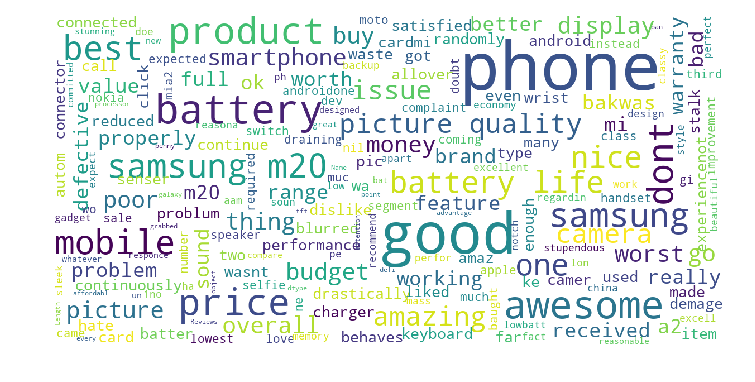

In [95]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=20                #10 
mpl.rcParams['savefig.dpi']=300             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(tdata['Reviews'])

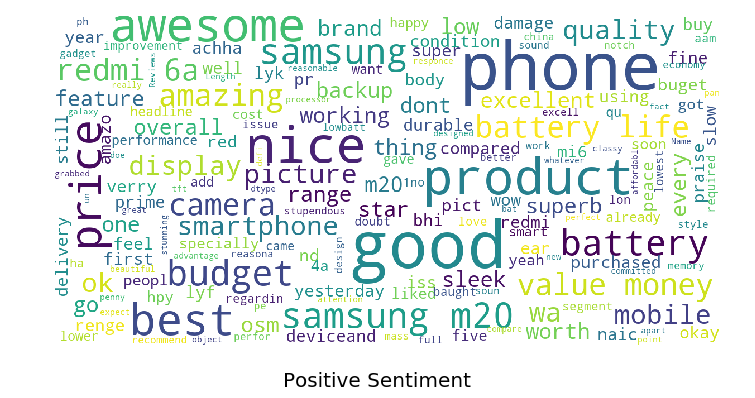

In [96]:
show_wordcloud(tdata[tdata.Sentiment==1]['Reviews'],title='Positive Sentiment')

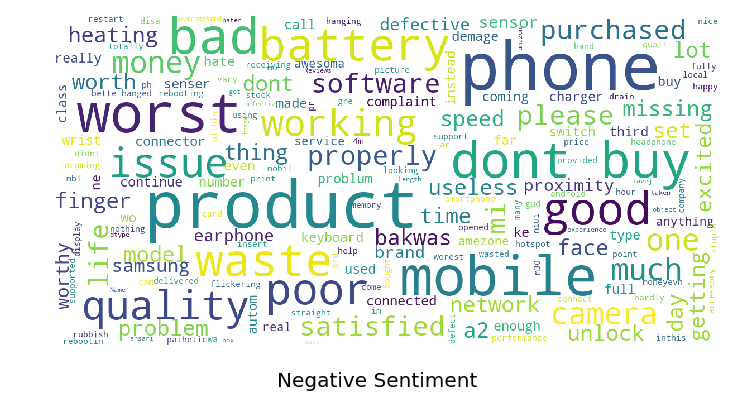

In [97]:
show_wordcloud(tdata[tdata.Ratings==1]['Reviews'],title='Negative Sentiment')

In [154]:
## Modelling
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# y_train=train['Sentiment'].values
# y_test=test['Sentiment'].values

tfidf_vectorizer = TfidfVectorizer(stop_words='english',min_df=8)
X_tfidf = tfidf_vectorizer.fit_transform(tdata['Reviews'])
y=tdata['Sentiment'].values
X_train_tfidf,X_test_tfidf,y_train,y_test=train_test_split(X_tfidf,y,test_size=0.2,random_state=31)
prediction=dict()

In [155]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
prediction['Multinomial'] = model.predict(X_test_tfidf)

from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train_tfidf, y_train)
prediction['Bernoulli'] = model.predict(X_test_tfidf)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1)
model.fit(X_train_tfidf, y_train)
prediction['Logistic'] = model.predict(X_test_tfidf)

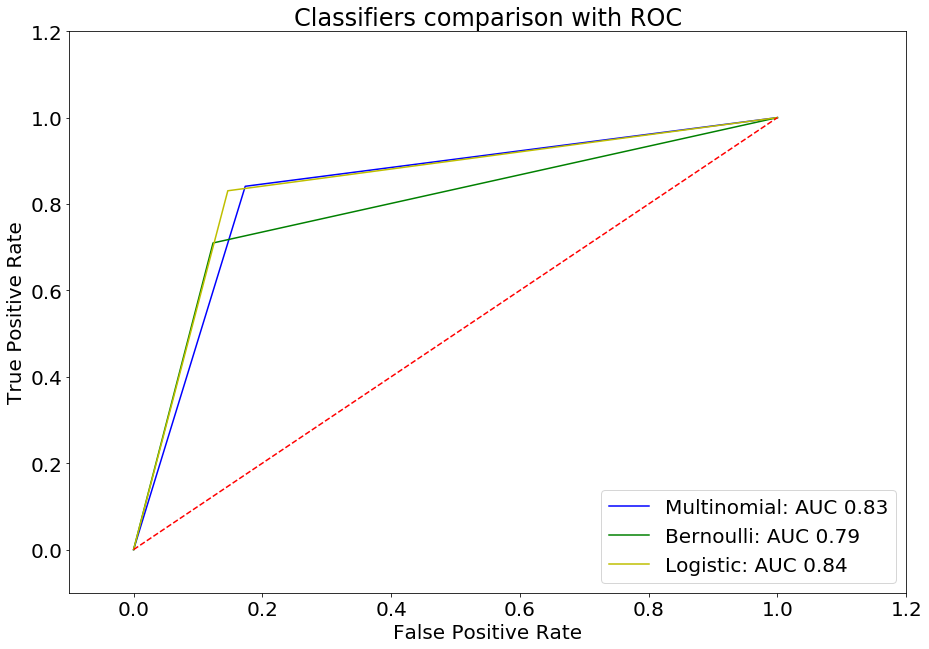

In [156]:
cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
plt.figure(figsize=(15,10))
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predicted)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [157]:
y_pred=prediction['Logistic']
from sklearn.metrics import classification_report
target_names=["Positive Sentiment","Negative Sentiment"]
print(classification_report(y_test, y_pred, target_names=target_names))

                    precision    recall  f1-score   support

Positive Sentiment       0.86      0.85      0.86      5016
Negative Sentiment       0.82      0.83      0.82      3956

       avg / total       0.84      0.84      0.84      8972

